# Первичная выгрузка данных

## Введение

Работа производится на данных о продаже компрьюетрных игр онлайн магазина

На основании данных из открытых источников: данных о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
На основании данных до 2016 года необходимо спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными.

Целью работы является анализ данных, для определения ключевых закономерностей по продаже игр, для формирования стратегии продаж следующего периода.

## Импорт библиотек

In [1]:
!pip install missingno -q

In [2]:
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Импорт датасета

### Импорт

### Первичная информация по данным

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


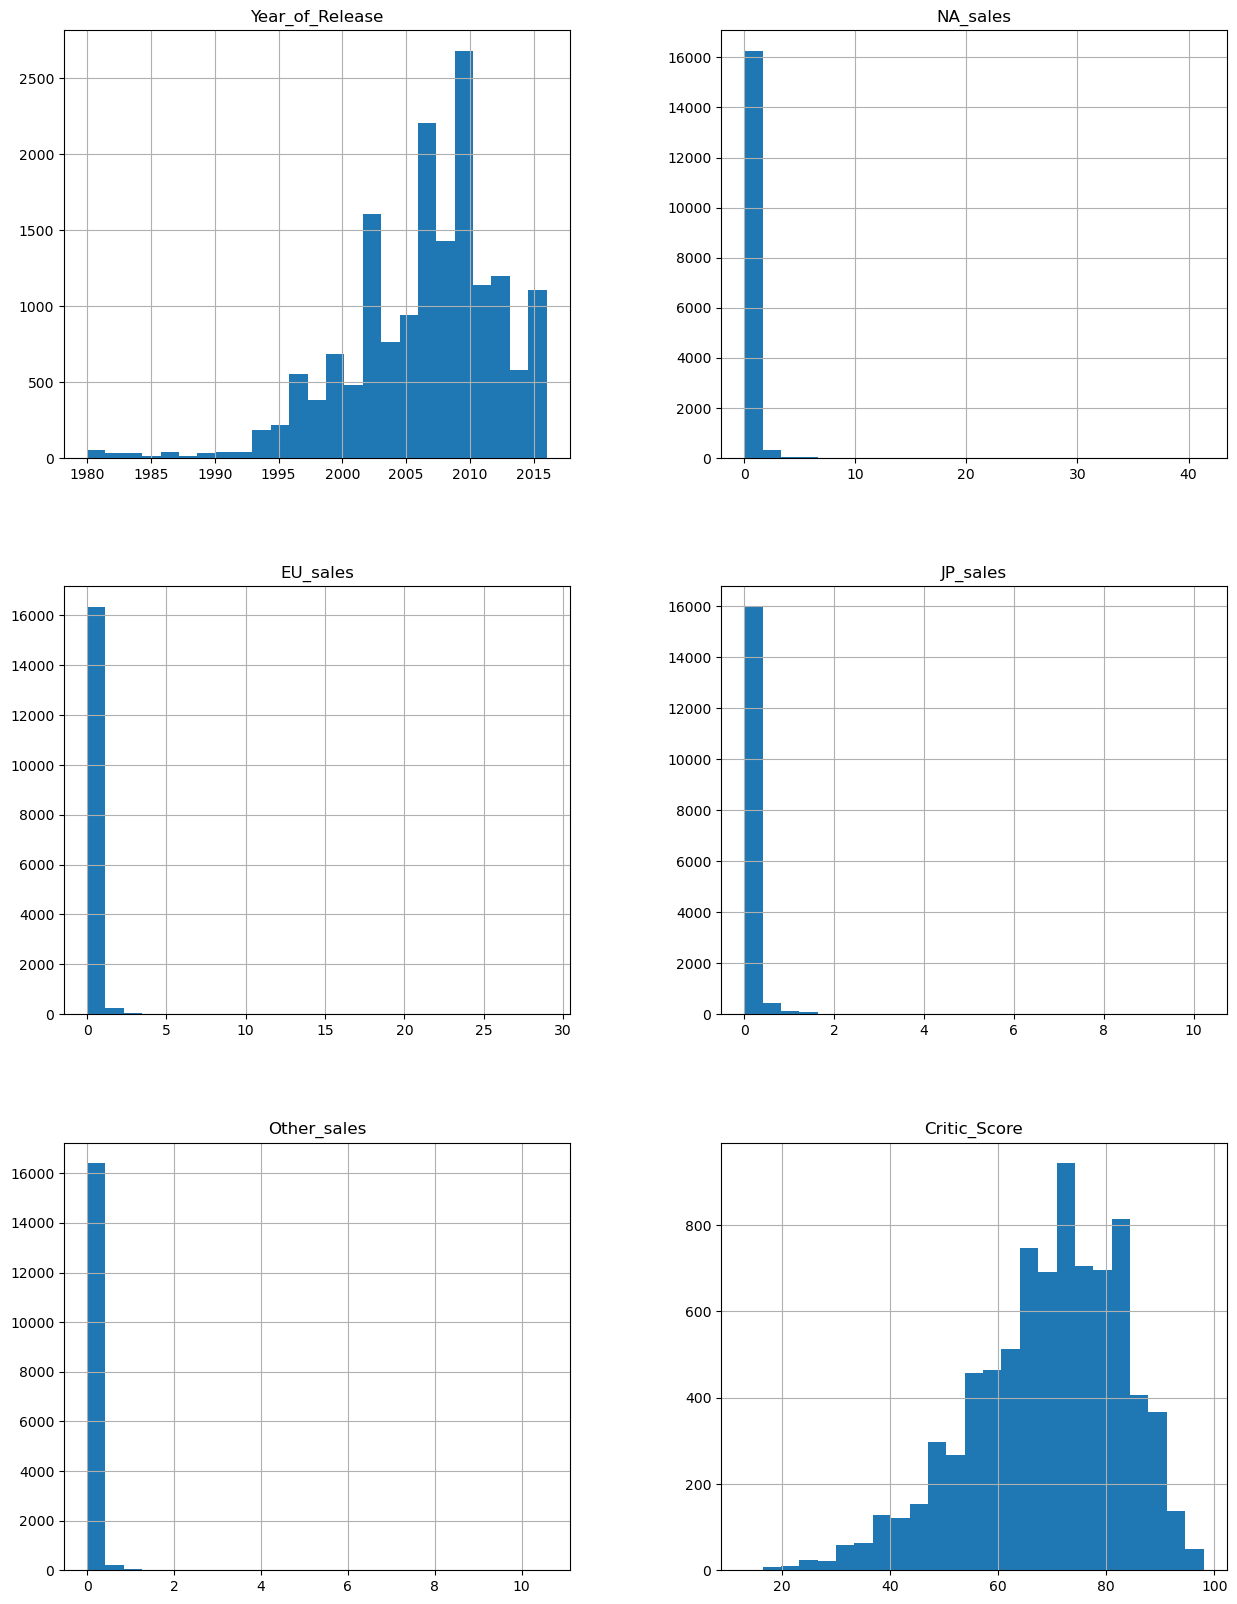

In [6]:
data.hist(figsize=(15, 20), bins=25);

### Просмотр количества пропущенных значений

In [7]:
data.isna().mean()*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

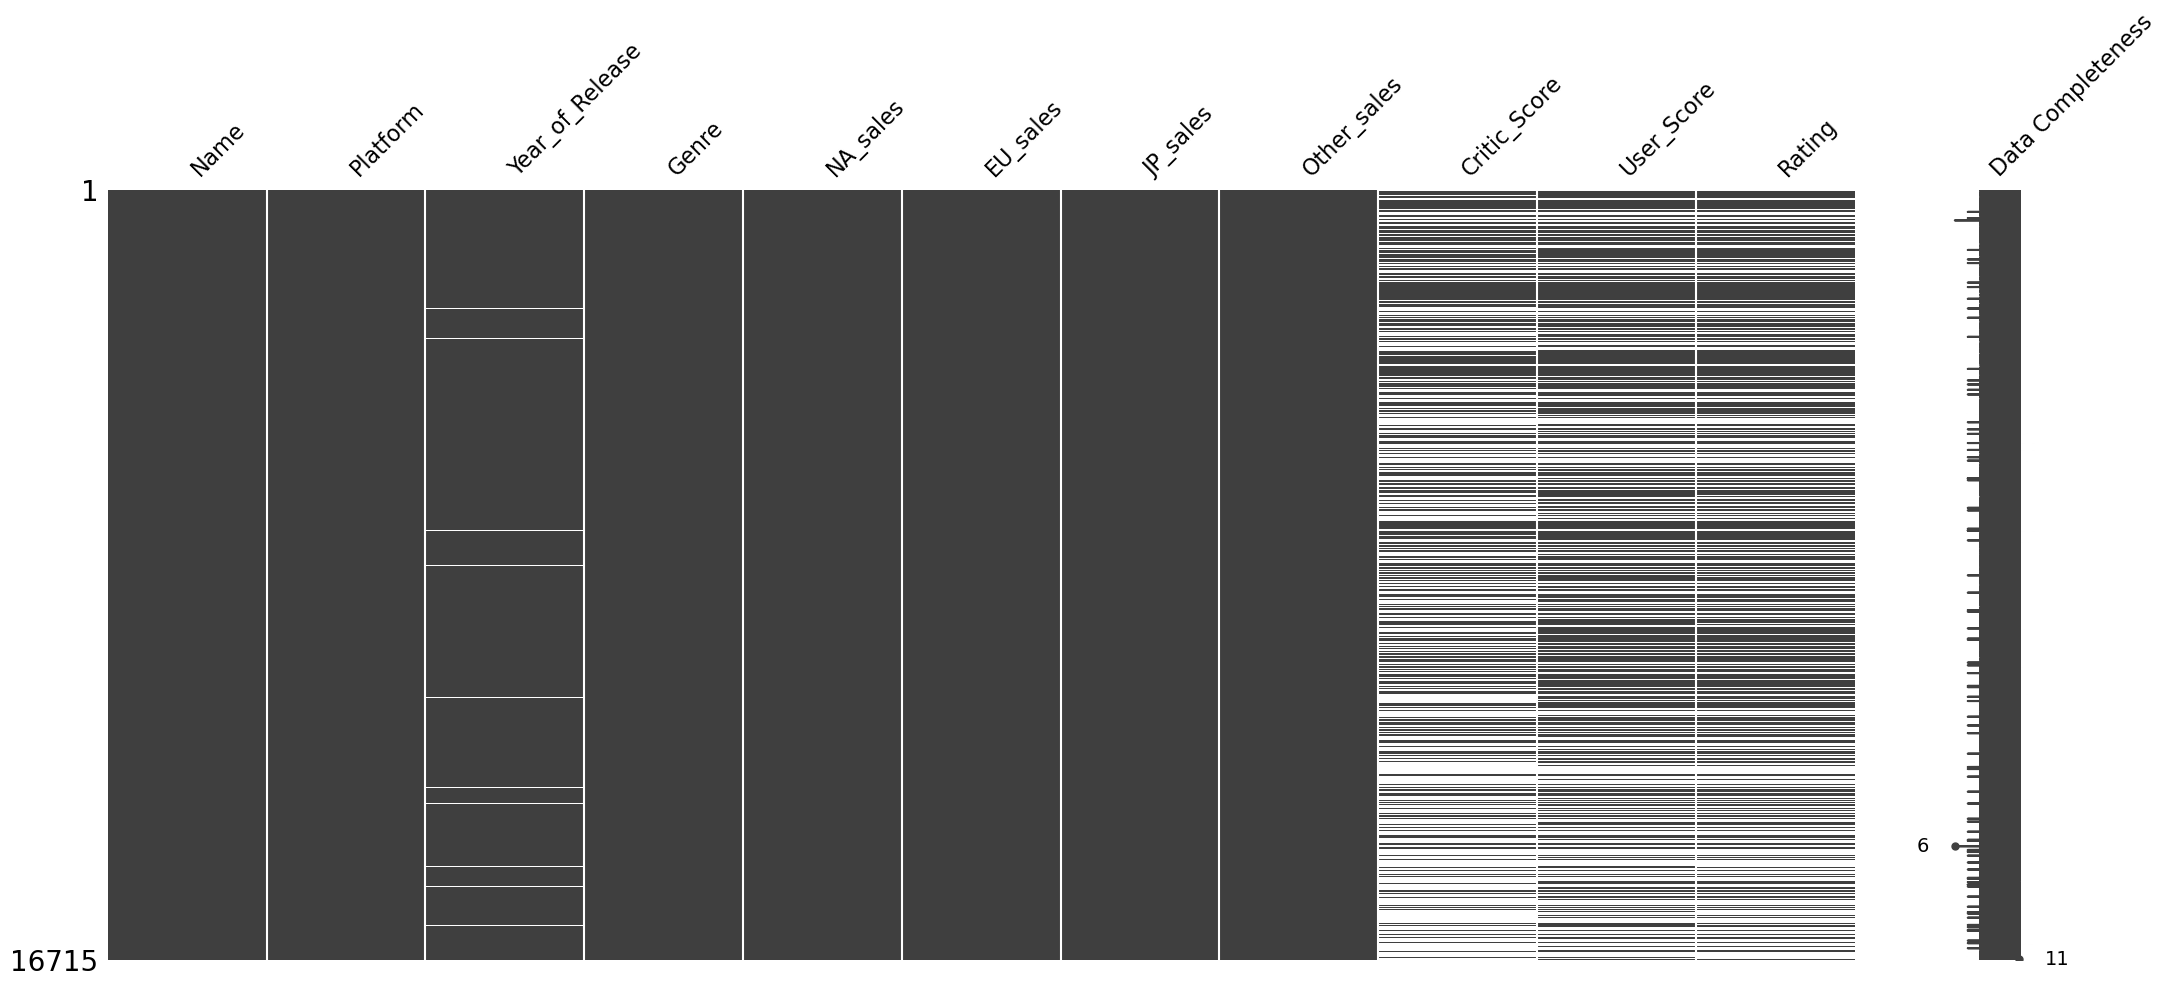

In [8]:
msno.matrix(data, labels=True);

## Выводы по данным

Всего предоставлено информации по `16714` строк в `10` столбцах.

В таблице наблюдаются проблемы:
* некорректное наименование столбцов, что будет изменено к единому виду маленького регистра;  
* в столбцах **critic_score (оценка критиков)** отсутствует `51%` значений, в столбцах **user_score (оценка пользователей)** и **rating (рейтинг)** отсутствует около 40% данных. В остальном таблица заполнена в большом объеме.
* в столбце **Year_of_Release (год выпуска)** находятся данные в формате `float` что говорит о наличии дробных чисел.
* в столбце **Users_score (оценка пользователей)** данные в формате `object`;
* из п. 1.3.3 (график заполненности таблицы) видно, что пустые значения в столбцах **Оценка критиков** и **Оценка пользователей** зачастую пустые одновременно. 

Возможные причины больших пропусков в столбцах являются:
* малый тираж игры (отсутствие популярности), в следствии чего ни критики, ни пользователи не ставили оценки на соответствующем сайте;
* ошибка хранения/выгрузки данных;



*Правильно было бы создать багрепорт по сбору данных, так как большое количество пропусков в столбцах оценки критиков, оценки пользователей и рейтинге, но материал является учебным*

# Обработка пустых и некорректных данных

## Переименование наименований столбцов

In [9]:
data.columns = data.columns.str.lower()

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Обработка данных в столбцах

### Обработка дубликатов

In [11]:
data.duplicated().mean()

0.0

полных дубликатов строк нет

In [12]:
data[data[['name', 'platform']].duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Анализ дубликатов по комбинации наименования и платформы показывает дубликаты у игр `Madden NFL 13` и `Sonic the Hedgehog`.  
Игра `Need for Speed: Most Wanted` не являются дубликатами, так как разный год выпуска подразумевает переиздание.

In [13]:
# сохраним сумарные величины продаж регионов в переменных для игры Madden NFL 13
madden_duplicate_na = data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'na_sales'].sum()
madden_duplicate_eu = data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'eu_sales'].sum()
madden_duplicate_jp = data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'jp_sales'].sum()
madden_duplicate_other = data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'other_sales'].sum()

In [14]:
# сохраним сумарные величины продаж регионов в переменных для игры Sonic the Hedgehog
sonic_duplicate_na = data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'na_sales'].sum()
sonic_duplicate_eu = data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'eu_sales'].sum()
sonic_duplicate_jp = data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'jp_sales'].sum()
sonic_duplicate_other = data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'other_sales'].sum()

In [15]:
# исключение дублирующих строк
data = data.drop([16230, 4127])

In [16]:
data[data[['name', 'platform']].duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
# Замена значений для игры Madden NFL 13 на соответствующие данные в столбцах продаж
data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'na_sales'] = madden_duplicate_na
data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'eu_sales'] = madden_duplicate_eu
data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'jp_sales'] = madden_duplicate_jp
data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'other_sales'] = madden_duplicate_other

In [18]:
# проверка замены и исключения дубликата
data.loc[(data['name'] == 'Madden NFL 13')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


In [19]:
# Замена значений для игры Sonic the Hedgehog на соответствующие данные в столбцах продаж
data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'na_sales'] = sonic_duplicate_na
data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'eu_sales'] = sonic_duplicate_eu
data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'jp_sales'] = sonic_duplicate_jp
data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'other_sales'] = sonic_duplicate_other

In [20]:
# проверка замены и исключения дубликата
data.loc[(data['name'] == 'Sonic the Hedgehog')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+


### Обработка столбца **Year_of_Release (год выпуска)**

In [21]:
data['year_of_release'].median()

2007.0

In [22]:
data['year_of_release'].mean()

2006.4842809364548

Среднее и медианное значение почти идентично, так как общее количество пропусков по столбцу составляет `1.6%` пропущенные значения будут заполнены медианным значением по группам платформ.

In [23]:
data = data.dropna(subset=['year_of_release'])

In [24]:
# приведение значений в столбце к типу `int`
data['year_of_release'] = data['year_of_release'].astype(int)

In [25]:
# проверка значений в столбце
data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

В столбце **Год выпуска** пропущенные значения заменены на медианное значение по медианному значению в соответствии с платформой. Замена медианных значений в привязке к платформе было сделано, так как разные платформы выпускались и снимались с производства в разные годы. Далее значения были приведены к типу данных `int`.  
Аномальных выбросов в данном столбце нет.

### Обработка пропусков и дубликатов в столбце `Жанр`

In [26]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце `жанр` пропущено 2 строки, в которых отсутствует практически вся информация. Данные строки будут исключены.

In [27]:
data = data.dropna(subset=['genre'])

In [28]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Скрытых дубликатов в столбце `Жанр` нет.

### Обработка столбца `Оценка критиков`

In [29]:
data['critic_score'].isna().mean()*100

51.45654685884571

In [30]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

### Обработка столбца **Оценка пользователей**

In [32]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Среди данных есть пустые значения и значения `TBD`.

In [33]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2376

In [34]:
data['user_score'].isna().sum()

6605

Во всей таблице содержится `2324` значения `TBD` и `6699` значений пропущено, что составляет `13%` и `40%` соответственно.  
Данные в буквенном формате мешают обработке и целесообразно заменить на значение `-1`, что позволит выделить их в отдельную категорию и работать с числовыми данными.

In [35]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '-1.0'

In [36]:
data['user_score'] = data['user_score'].astype(float)

In [37]:
data['user_score'].sort_values().unique()

array([-1. ,  0. ,  0.2,  0.3,  0.5,  0.6,  0.7,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,
        4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,
        5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,
        6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,
        7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
        9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  nan])

### Создание столбца **общего количества продаж (total_sales)**

In [38]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Проверка обработки данных

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Выводы по итогам предобработки данных

В ходе предобработки данных:
* исключены 4 строки с дубликатами или некорректной информацией;
* заполнены пропуска в столбце `Год выпуска` в `1.6%` строк;
* в столбце `Оценка пользователей` значение TBD заменено на уникальное значение `-1` для возможности работы с этим столбцом в числовом формате.

Замена пропущенных значений в столбцах оценки и рейтинга не будут заполнены данными на основании существующих в базе, так как это сильно исказит данные и могут привести к нулевым или негативным результатам.

# Исследовательский анализ данных

## Анализ выпуска игр по годам

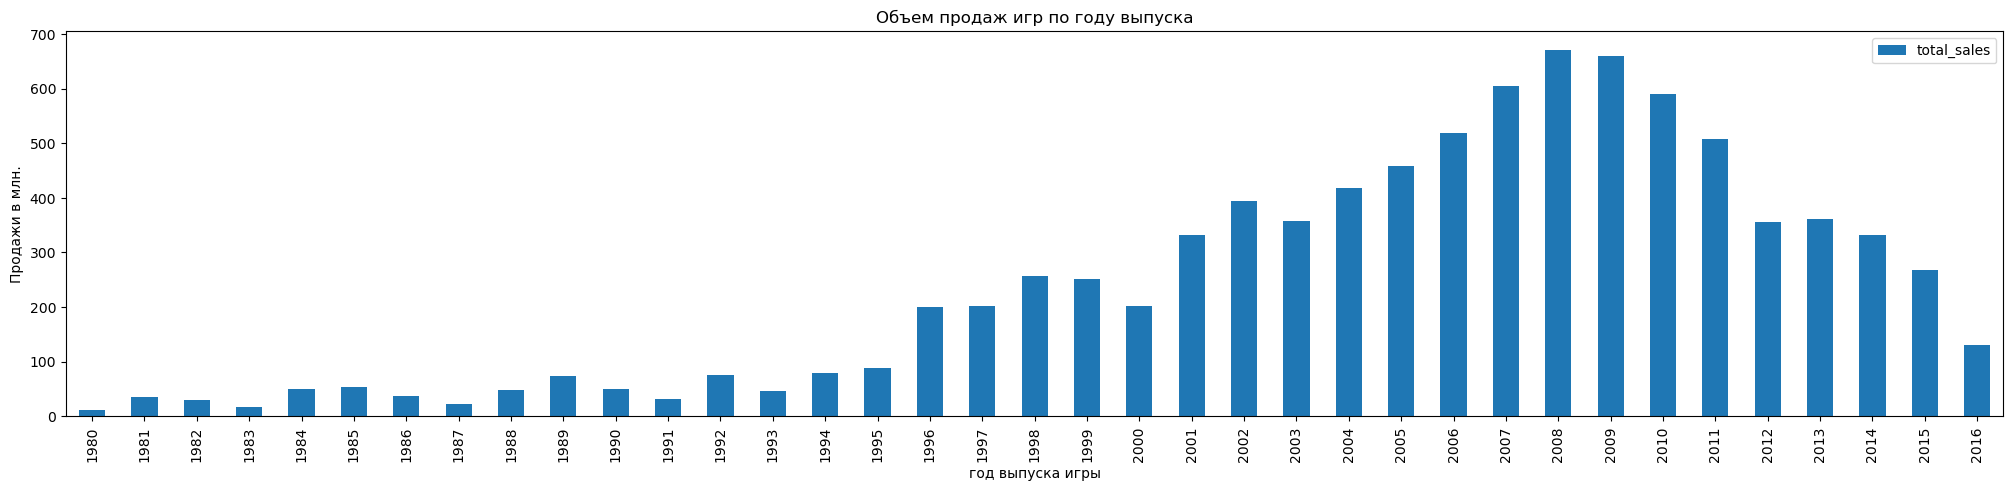

In [40]:
(pd
 .pivot_table(data, index='year_of_release', values='total_sales', aggfunc='sum')
 .reset_index()
 .plot(y='total_sales',
       x='year_of_release',
       ylabel='Продажи в млн.',
       xlabel='год выпуска игры',
       title='Объем продаж игр по году выпуска',
       kind='bar',
       figsize=(25,5))
);

Из графика видно, что он соответствует нормальному распределению со смещением вправо. Пик продаж приходится на игры выпущенные в 2008-2009 году.

## Анализ выпуска игр по платформе

In [41]:
top_10_platform = (pd
 .pivot_table(data, index='platform', values='total_sales', aggfunc='sum')
 .reset_index()
 .sort_values(by='total_sales', ascending=False)
 .head(10)
)
top_10_platform

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.82
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Топ 10 популярных платформ по количеству проданных игр  на декабрь 2016 года являются:
1. PlayStation 2 - продано `1255.77` млн. игр;
2. Xbox X360 - продано `971.42` млн. игр;
3. PlayStation 3 - продано `939.65` млн. игр;
4. Wii - проодано `907.51` млн. игр;
5. Nintendo DS - продано `806.12` млн. игр;
6. PlayStation - продано `703.86` млн. игр
7. GBA - продано `317.85` млн. игр
8. PlayStation 4 - продано `314.14` млн. игр
9. PSP - продано `267.05` млн. игр
10. Персональный компьютер - продано `259.52` млн. игр

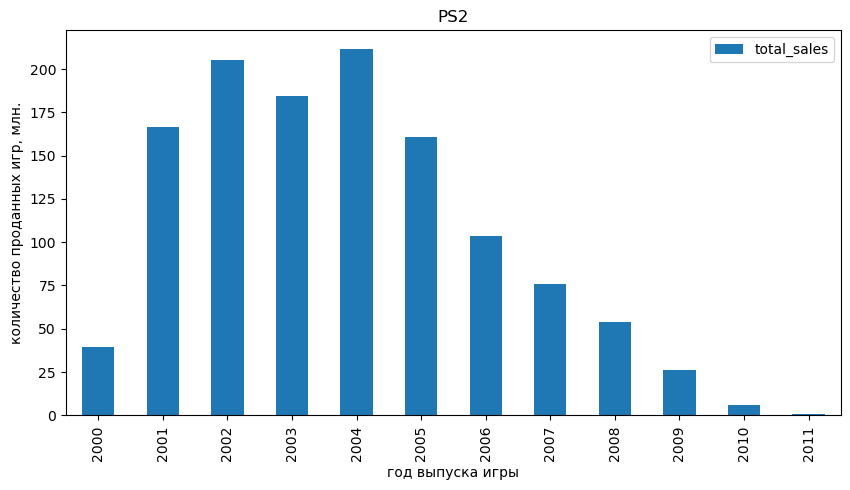

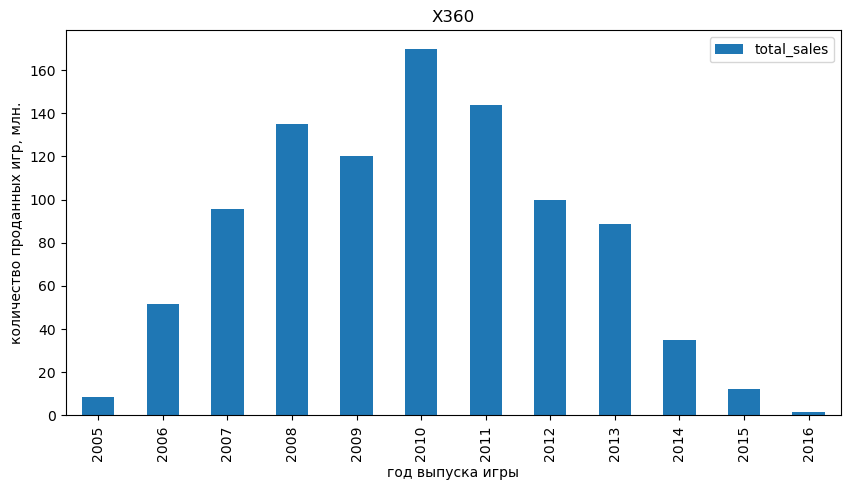

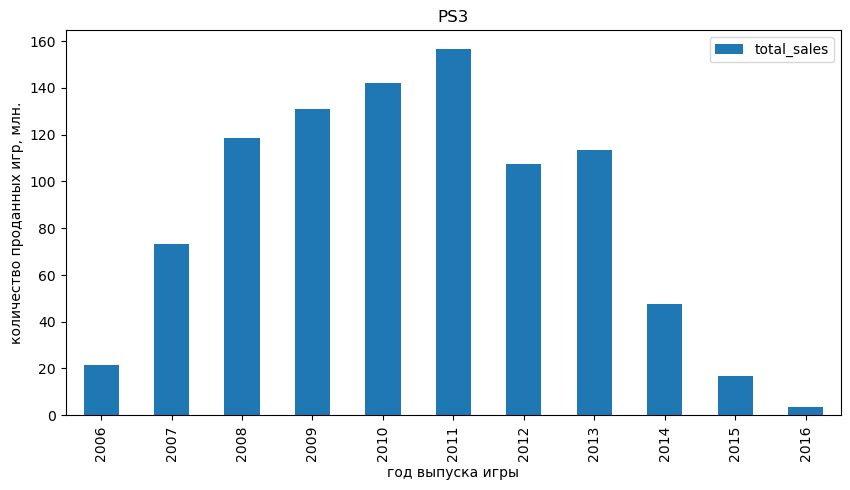

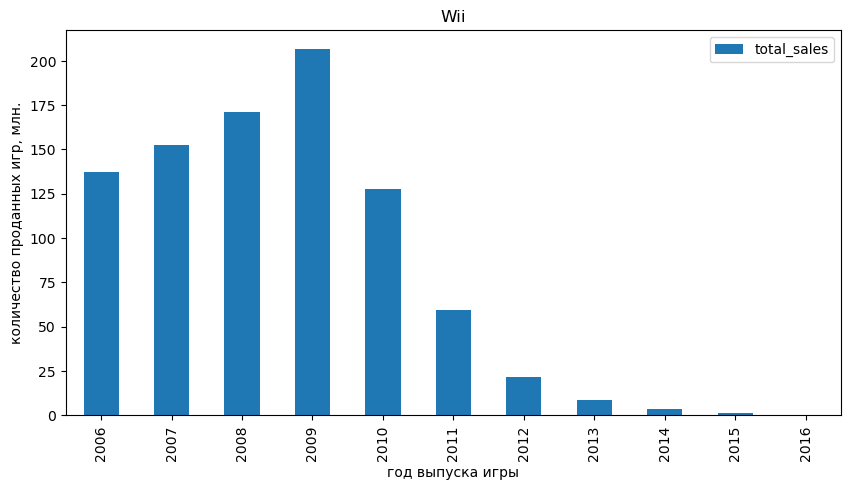

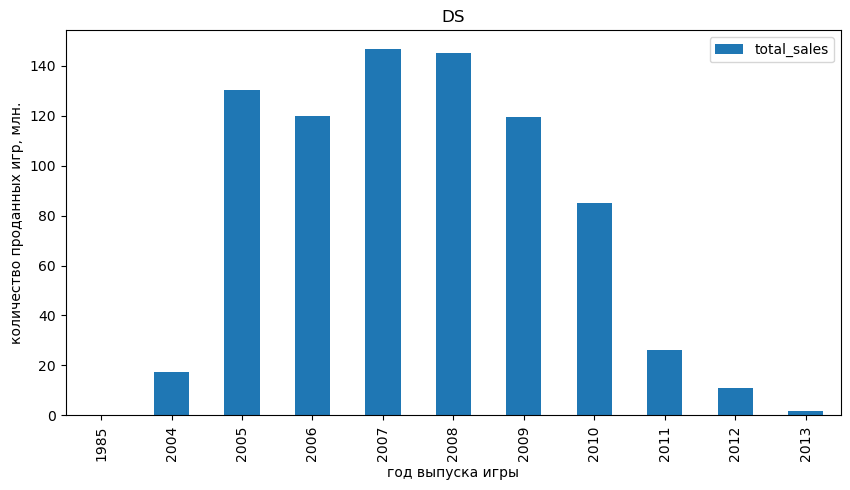

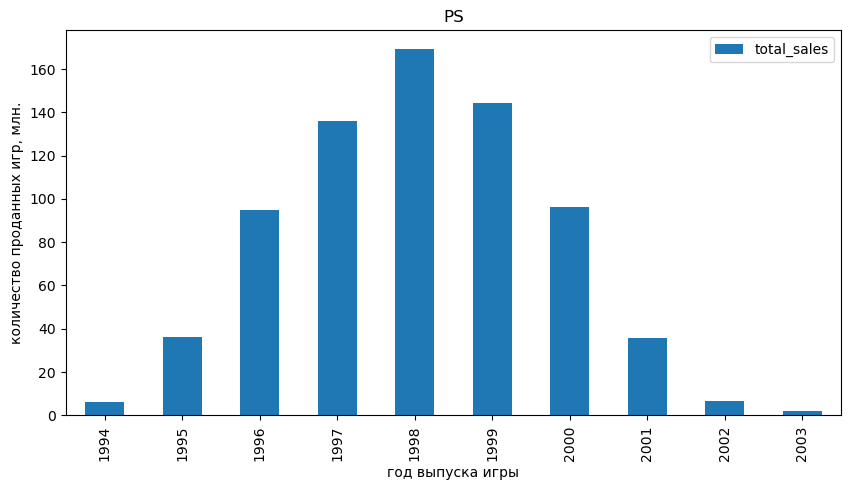

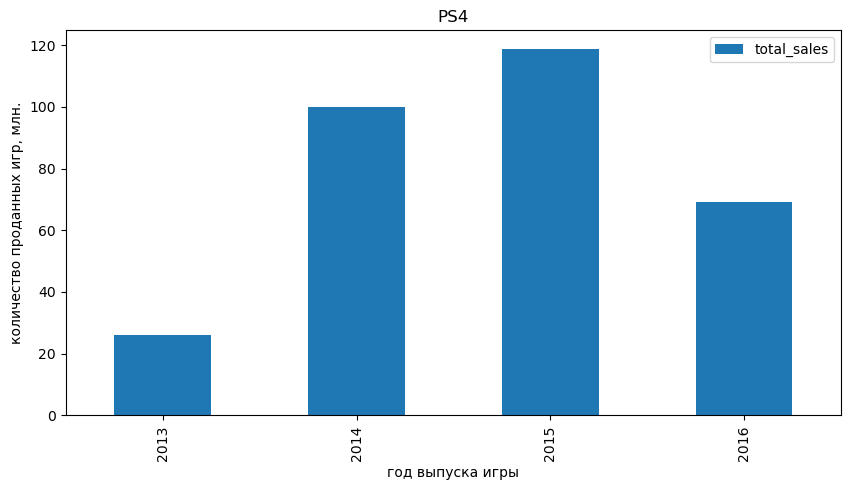

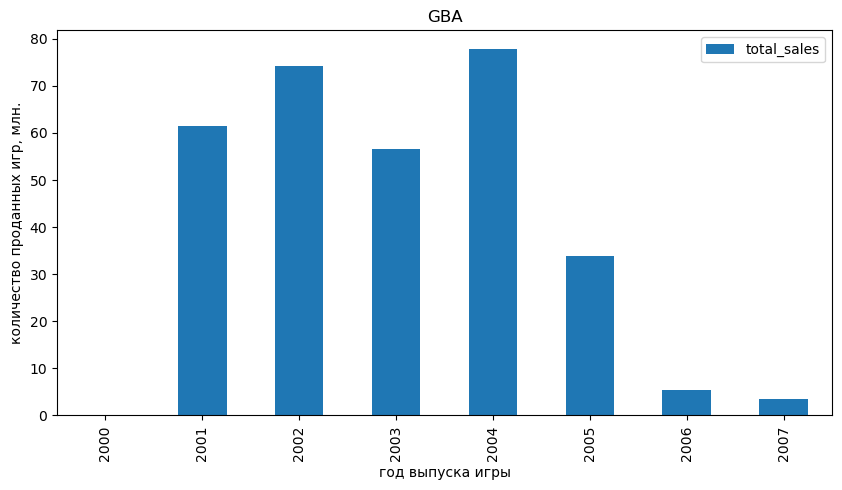

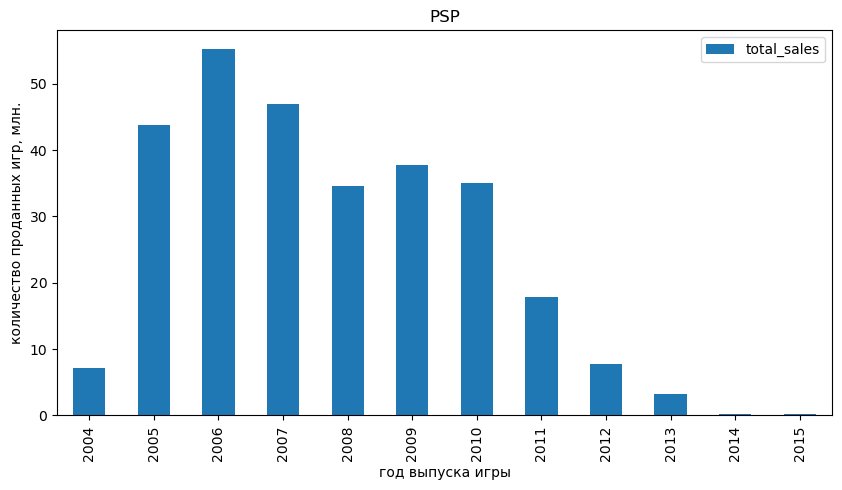

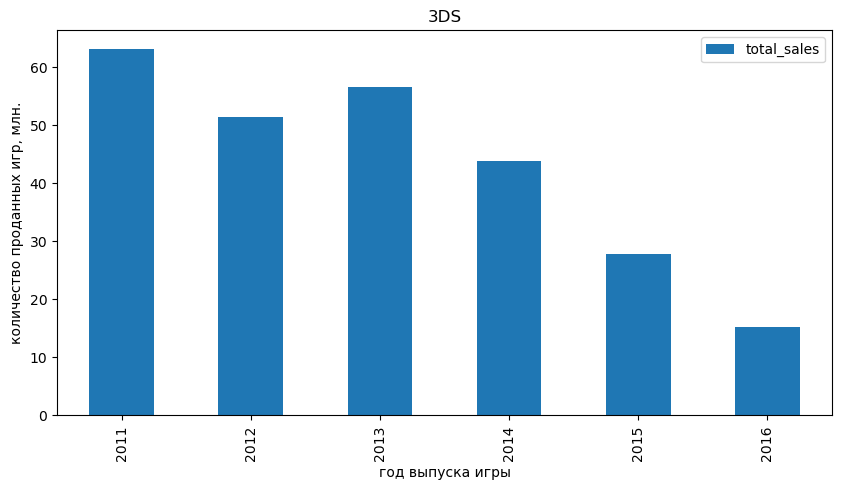

In [42]:
for plat in top_10_platform['platform']:
    data[data['platform'] == plat].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
                                    .plot(kind='bar', title=plat, figsize=(10,5),
                                          ylabel='количество проданных игр, млн.',
                                          xlabel='год выпуска игры');

Из графиков видно, что в среднем, платформа существует порядрка `10 лет`. Исключением является `Песрсональный компьютер(PC)`, так как данная платформа имеет другую модель производства и распространения игр. Также, выбивается платформа `PS4`, это связано что платформа является новым продуктом и не дошла в своем времени существовании до середины среднестатистической платформы.

## Актуальный период

Для прогноза данных на 2017 год, целесообразно брать данные с 2012 года, потому что тогда, в соответствии с нормальным распределением и временем жизни платформы в 10 лет, пик должен прийти на анализируемый год.

## Анализ прибыльности платформ.

In [43]:
data_greater_2012 = data.loc[data['year_of_release'] >= 2012]

In [44]:
(pd
 .pivot_table(data_greater_2012, index='platform', values='total_sales', aggfunc='sum')
 .reset_index()
 .sort_values(by='total_sales', ascending=False)
)

,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


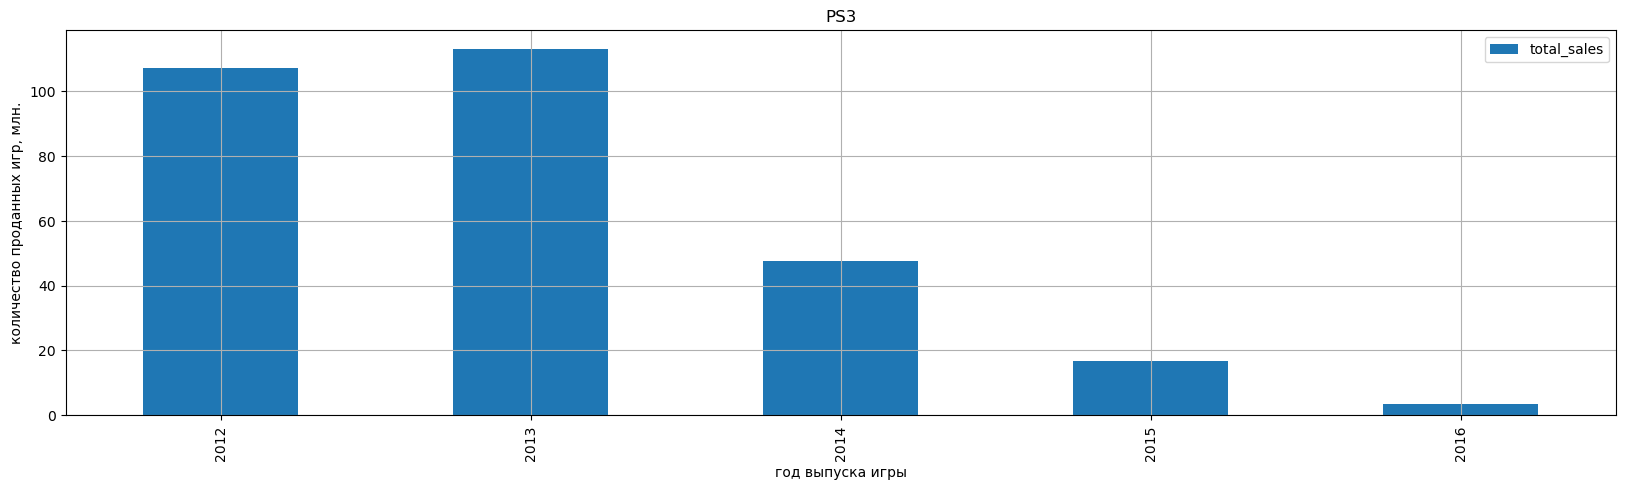

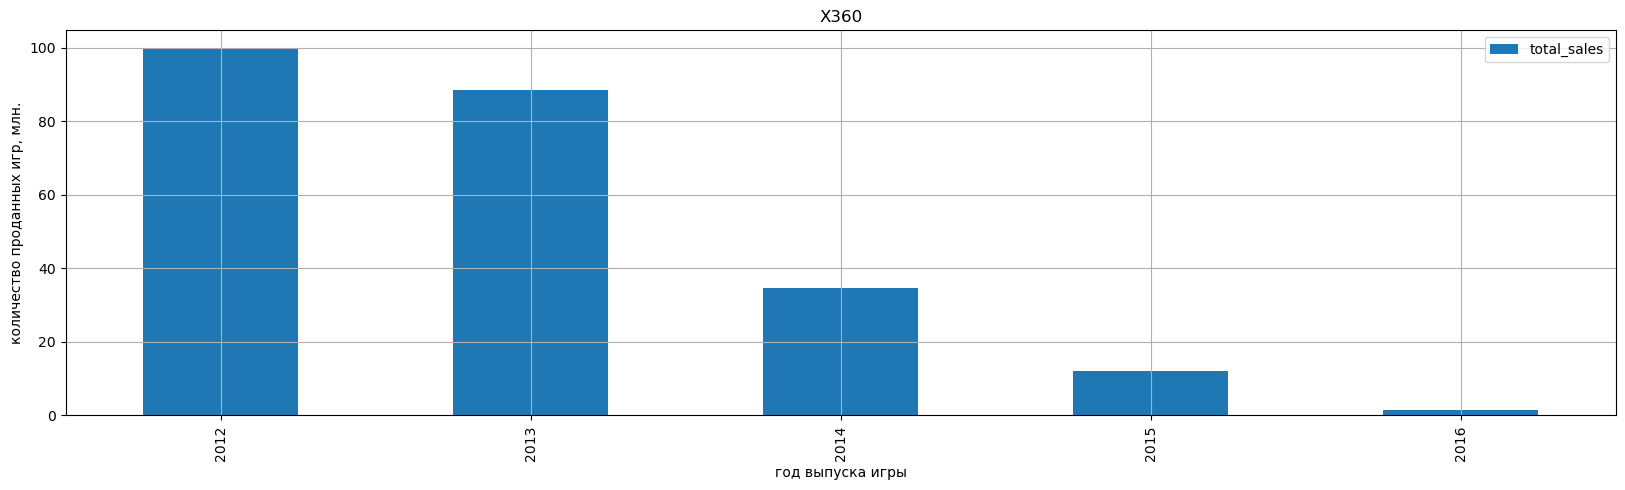

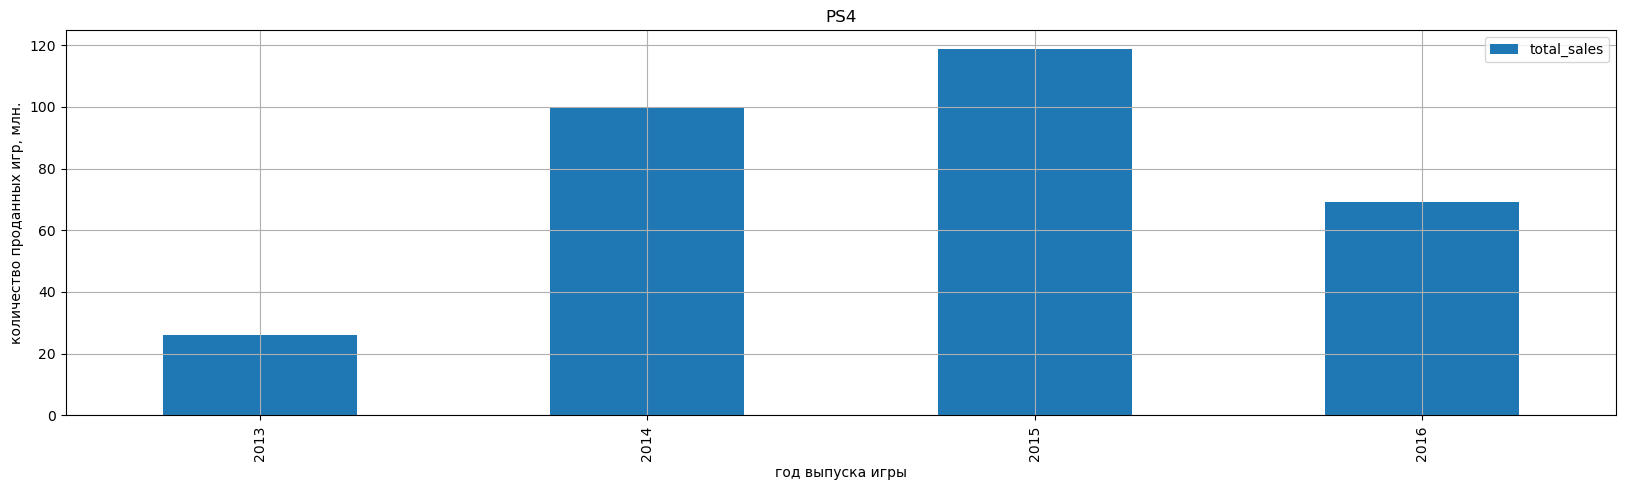

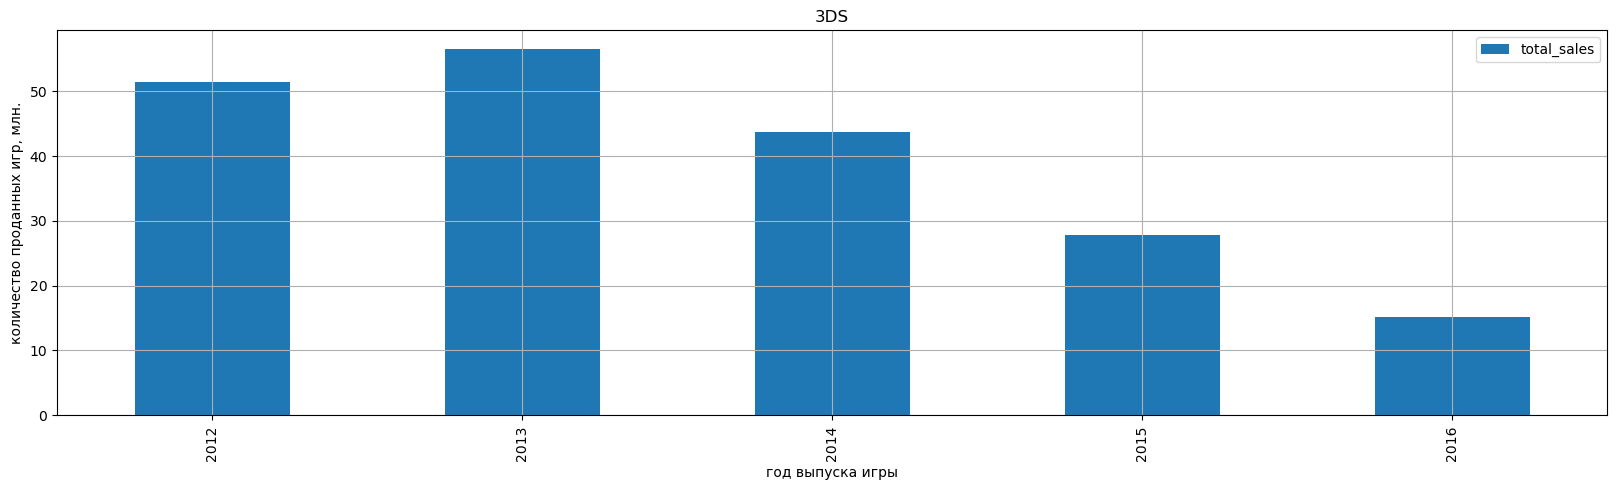

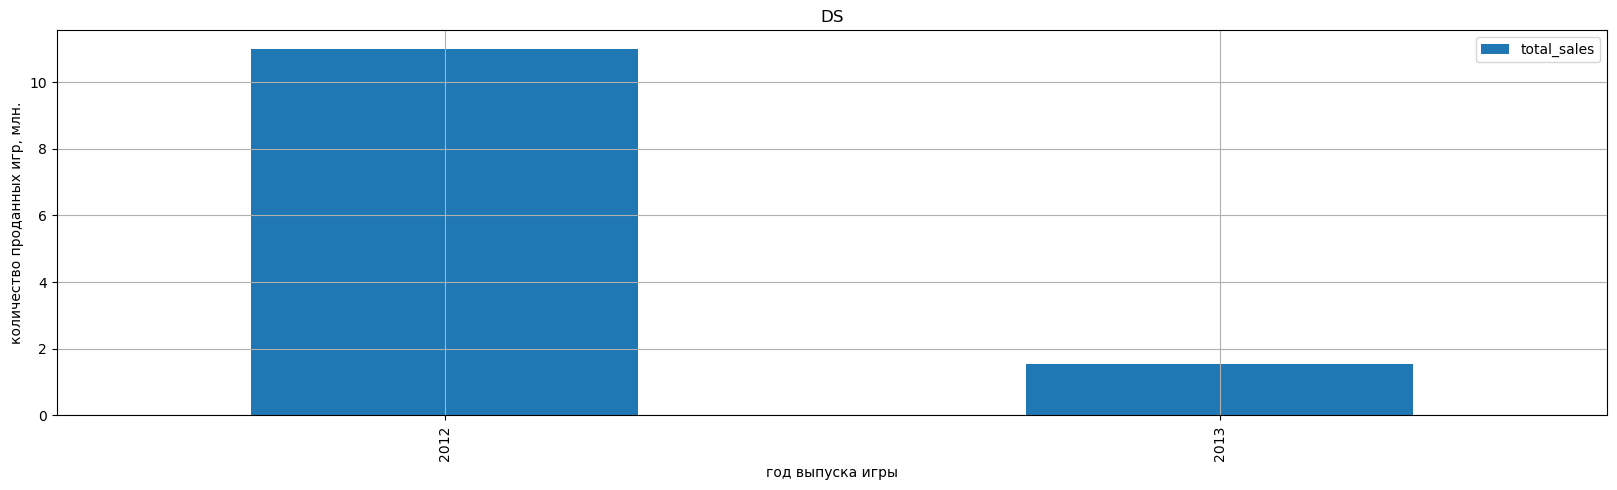

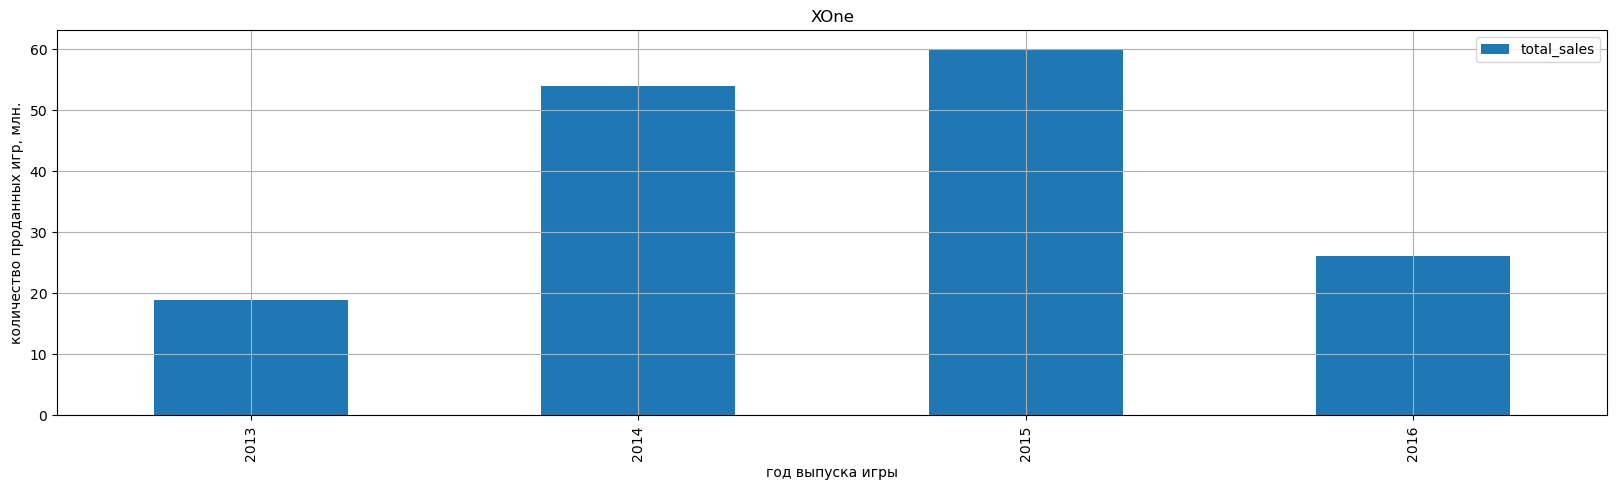

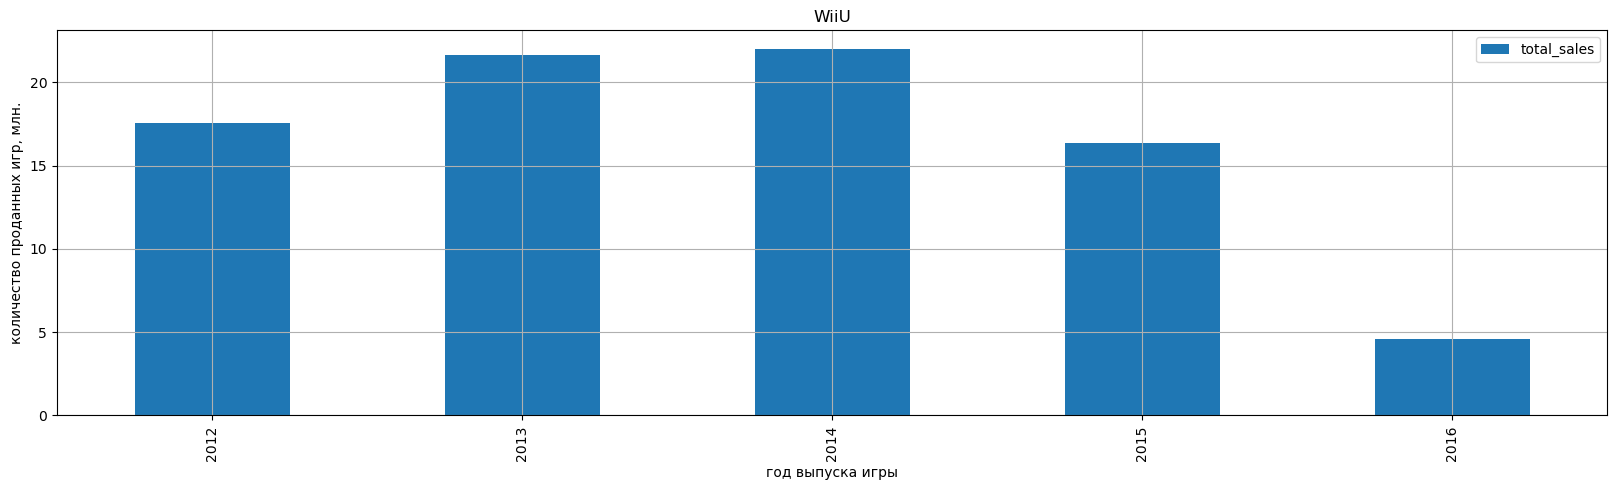

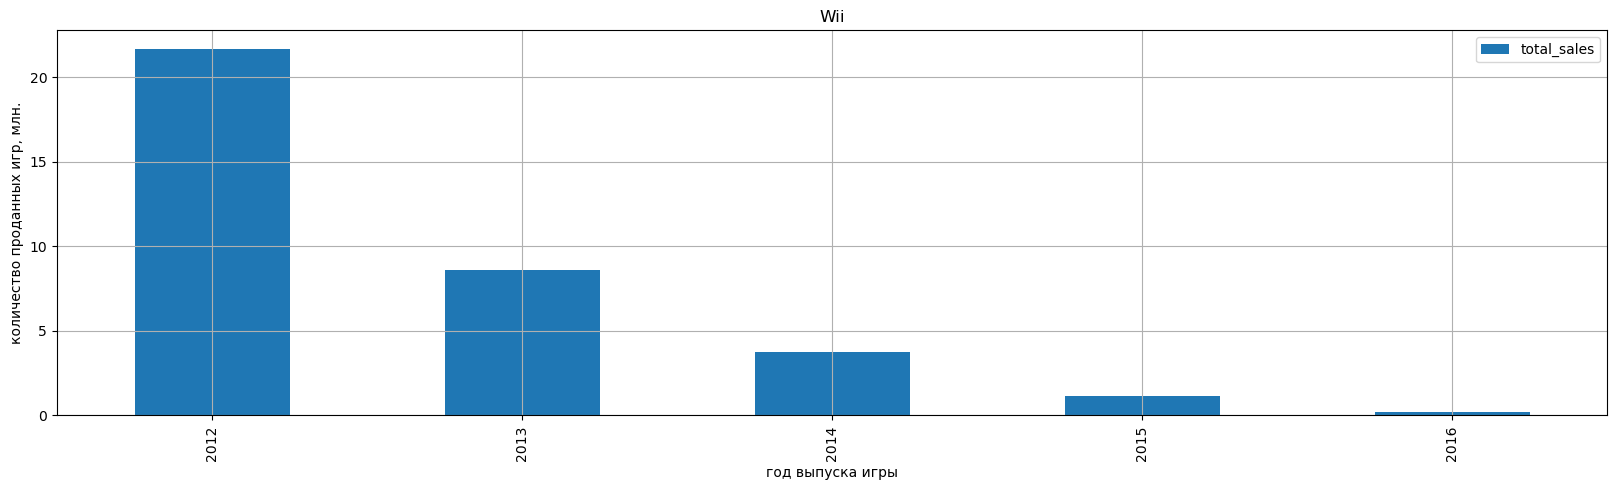

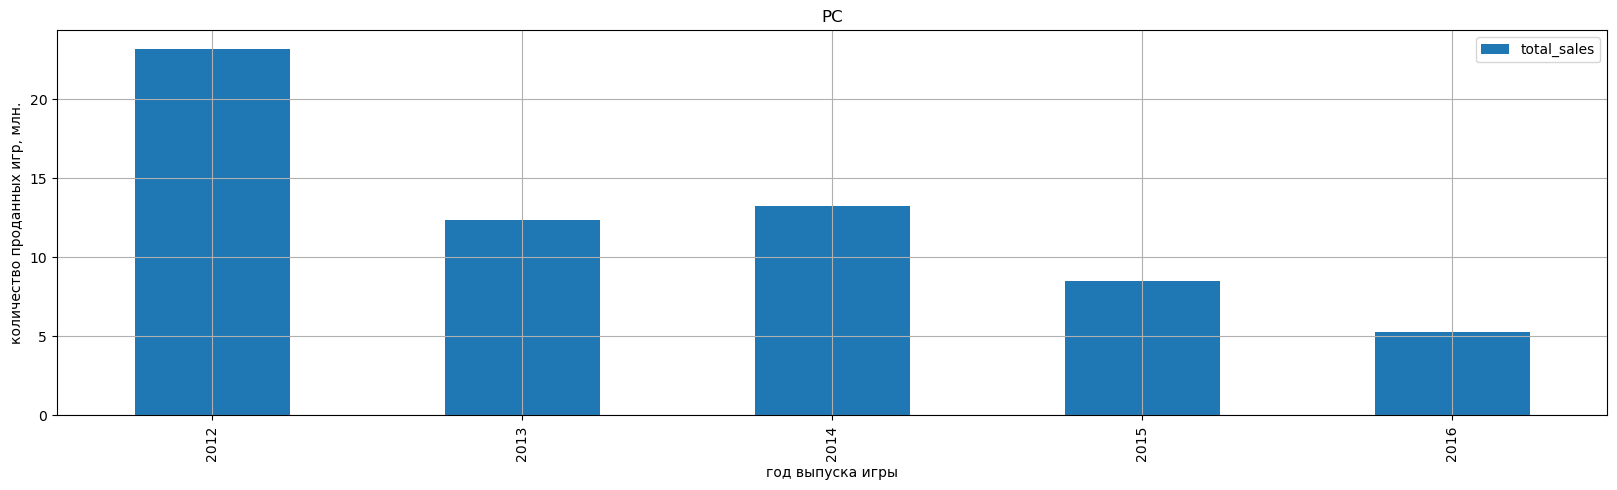

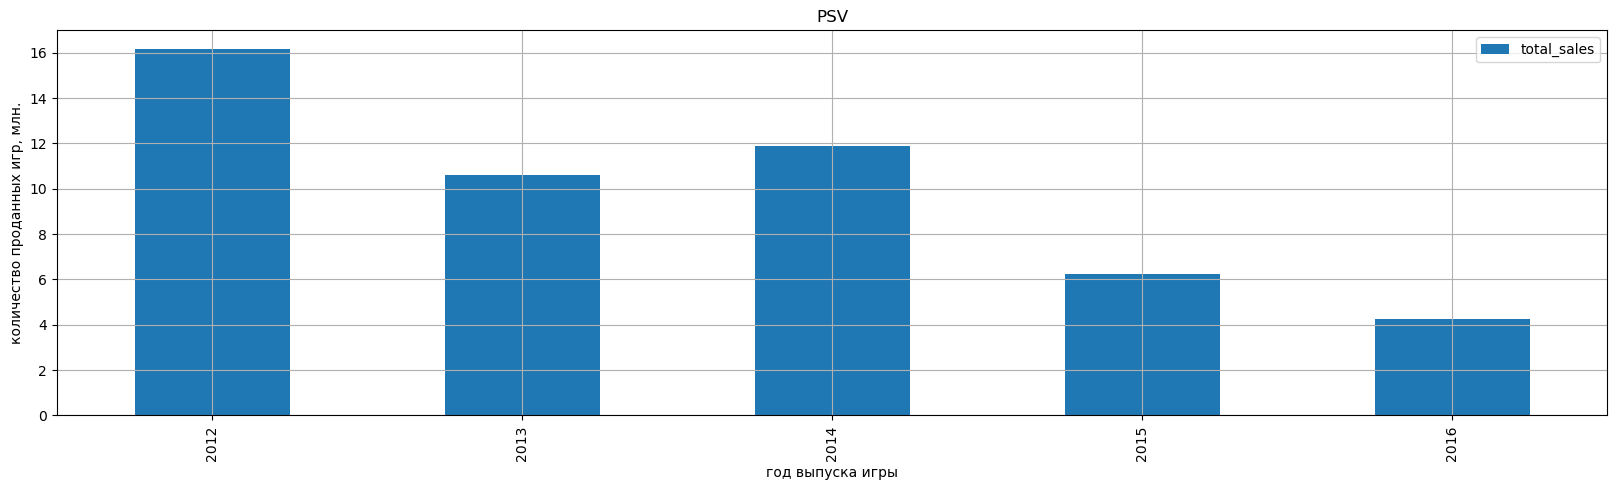

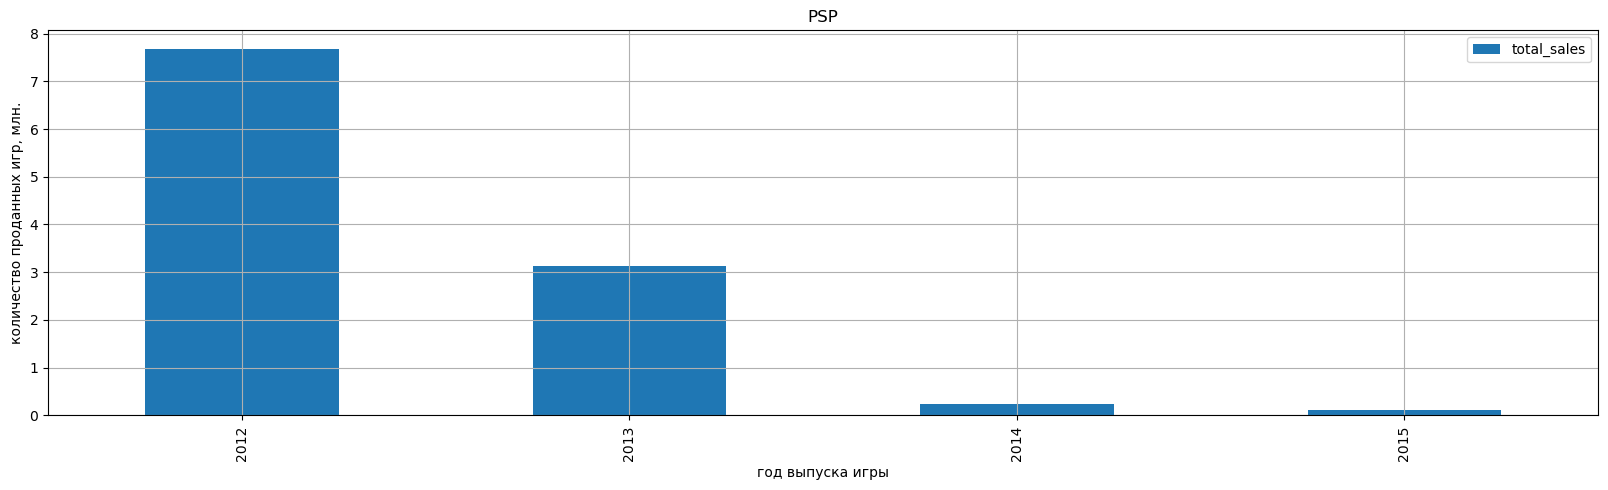

In [45]:
for plat in data_greater_2012['platform'].unique():
    data_greater_2012[data_greater_2012['platform'] == plat].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
                                    .plot(kind='bar', title=plat, figsize=(20,5),
                                          ylabel='количество проданных игр, млн.',
                                          xlabel='год выпуска игры',
                                          grid=True);

Из графиков видно, что уровень продаж возрастает для платформ `PlayStation 4` и `Xbox One`, `Персональный компьютер` показывает стабильный уровень с **2012 по 2015 год**.  
Данные за 2016 год не берутся в расчет, т.к. при анализе декабря месяца не все данные по 4 кварталу текущего года могут быть в предоставленной информации.

## Boxplot по глобальным продажам игр в разбивке по платформам

In [46]:
# закоментировал после ревью 2
# for plat in data_greater_2012['platform'].unique():
#         data_greater_2012[data_greater_2012['platform'] == plat].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
#                                     .plot(kind='box', title=plat, figsize=(5,5), ylabel='количество проданных игр, млн.');

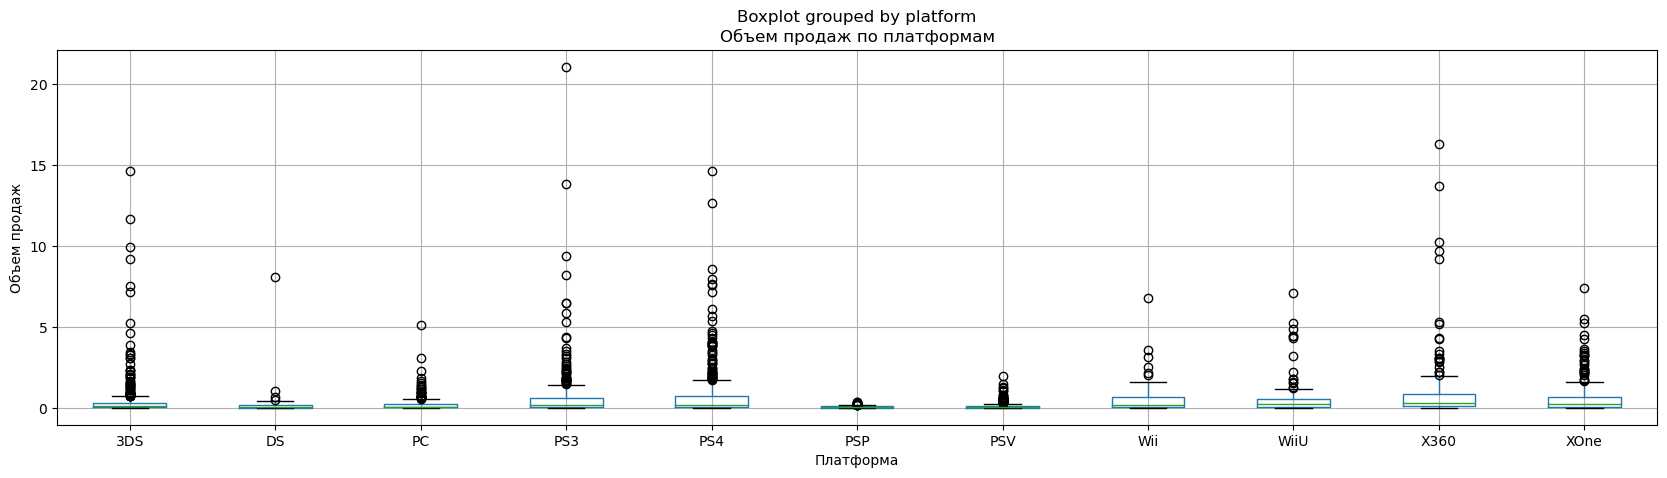

In [47]:
data_greater_2012.boxplot(column='total_sales', by='platform', figsize=(20, 5));
plt.title('Объем продаж по платформам')
plt.ylabel('Объем продаж')
plt.xlabel('Платформа')
plt.show()

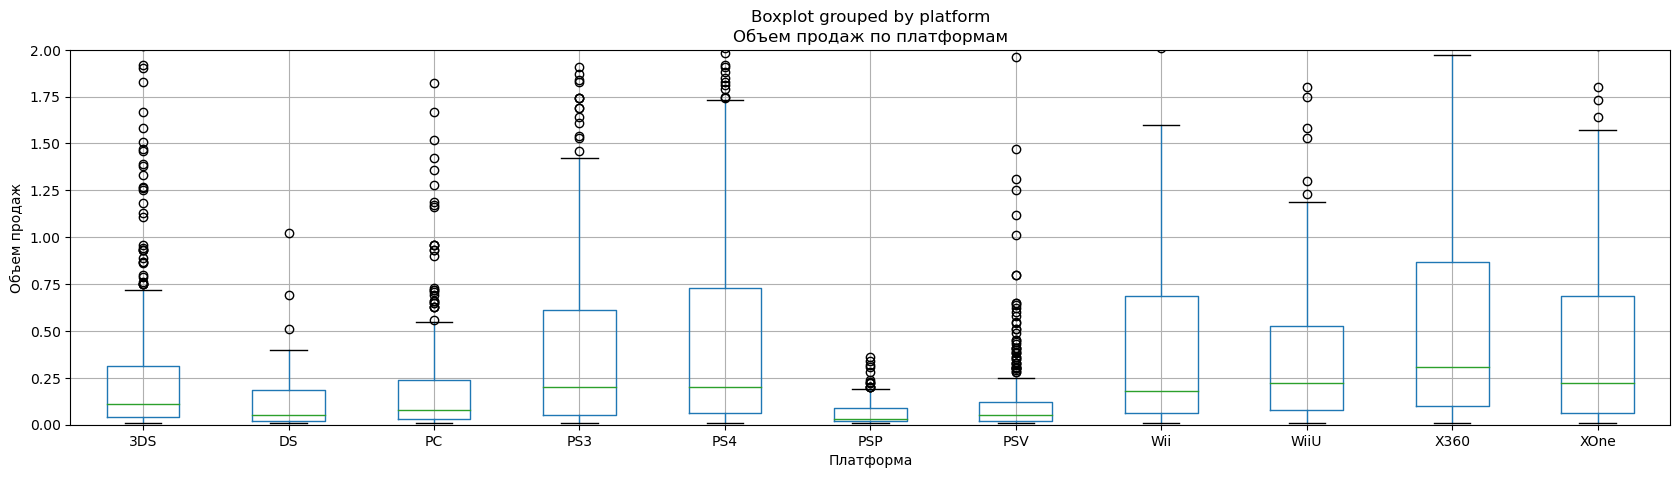

In [48]:
data_greater_2012.boxplot(column='total_sales', by='platform', figsize=(20, 5));
plt.ylim(0, 2)
plt.title('Объем продаж по платформам')
plt.ylabel('Объем продаж')
plt.xlabel('Платформа')
plt.show()

Из графика видно, что средний объем продаж игр для платформы `PS4` и `XOne` близки.

## Влияние отзывов критиков и пользователей на объем продаж

In [49]:
(data_greater_2012.loc[data_greater_2012['platform'] == 'PS4']
 .pivot_table(index=['name', 'critic_score', 'user_score'], values='total_sales')
 .reset_index()
 .sort_values(by='total_sales', ascending=False)
)

,name,critic_score,user_score,total_sales
84,Grand Theft Auto V,97.0,8.3,12.62
72,FIFA 16,82.0,4.3,8.58
32,Call of Duty: Advanced Warfare,83.0,5.7,7.66
73,FIFA 17,85.0,5.0,7.60
75,Fallout 4,87.0,6.5,7.17
...,...,...,...,...
121,Mark McMorris Infinite Air,49.0,6.0,0.01
163,Prototype: Biohazard Bundle,48.0,2.0,0.01
187,Sherlock Holmes: The Devil's Daughter,70.0,6.8,0.01
198,Super Dungeon Bros,42.0,2.3,0.01


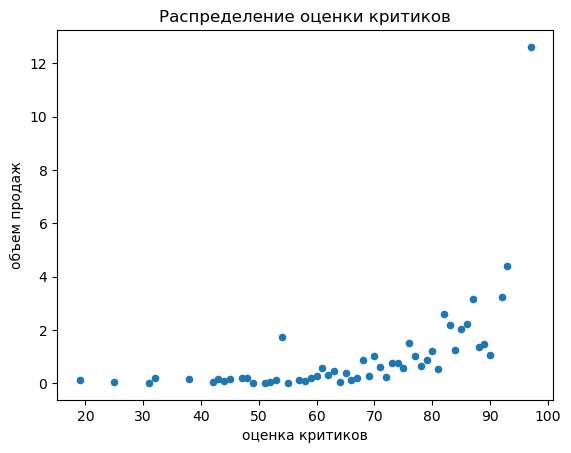

In [50]:
(data_greater_2012.loc[data_greater_2012['platform'] == 'PS4']
 .pivot_table(index='critic_score', values='total_sales')
 .reset_index()
 .plot(kind='scatter', x='critic_score', y='total_sales', title='Распределение оценки критиков', xlabel='оценка критиков', ylabel='объем продаж')
);

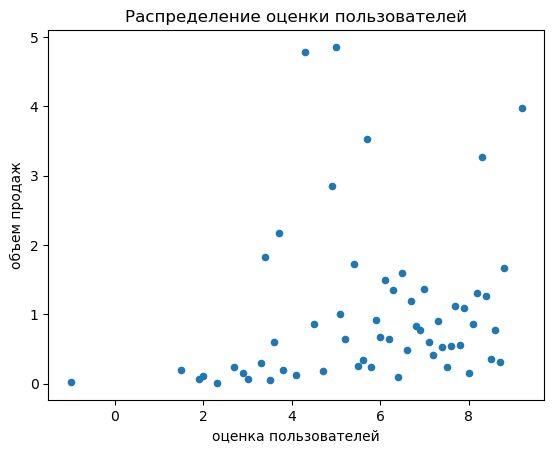

In [51]:
(data_greater_2012.loc[data_greater_2012['platform'] == 'PS4']
 .pivot_table(index='user_score', values='total_sales')
 .reset_index()
 .plot(kind='scatter', x='user_score', y='total_sales', title='Распределение оценки пользователей', xlabel='оценка пользователей', ylabel='объем продаж')
);

In [52]:
data[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.442323,0.163839
critic_score,0.442323,1.000000,0.245350
total_sales,0.163839,0.245350,1.000000


In [53]:
for plat in data['platform'].unique():
    display()
    display(f'Correlation for {plat}')
    display(data.loc[(data['platform'] == plat)&(data['user_score'] >= 0)][['user_score', 'critic_score', 'total_sales']].corr())

'Correlation for Wii'

,user_score,critic_score,total_sales
user_score,1.000000,0.688285,0.112831
critic_score,0.688285,1.000000,0.170855
total_sales,0.112831,0.170855,1.000000


'Correlation for NES'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for GB'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for DS'

,user_score,critic_score,total_sales
user_score,1.000000,0.653908,0.130876
critic_score,0.653908,1.000000,0.232258
total_sales,0.130876,0.232258,1.000000


'Correlation for X360'

,user_score,critic_score,total_sales
user_score,1.000000,0.625020,0.114187
critic_score,0.625020,1.000000,0.388992
total_sales,0.114187,0.388992,1.000000


'Correlation for PS3'

,user_score,critic_score,total_sales
user_score,1.000000,0.632847,0.127294
critic_score,0.632847,1.000000,0.428417
total_sales,0.127294,0.428417,1.000000


'Correlation for PS2'

,user_score,critic_score,total_sales
user_score,1.000000,0.565841,0.175055
critic_score,0.565841,1.000000,0.386415
total_sales,0.175055,0.386415,1.000000


'Correlation for SNES'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for GBA'

,user_score,critic_score,total_sales
user_score,1.000000,0.612652,0.106149
critic_score,0.612652,1.000000,0.241647
total_sales,0.106149,0.241647,1.000000


'Correlation for PS4'

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.405895
total_sales,-0.031957,0.405895,1.000000


'Correlation for 3DS'

,user_score,critic_score,total_sales
user_score,1.000000,0.745222,0.222078
critic_score,0.745222,1.000000,0.338904
total_sales,0.222078,0.338904,1.000000


'Correlation for N64'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for PS'

,user_score,critic_score,total_sales
user_score,1.000000,0.693122,0.300078
critic_score,0.693122,1.000000,0.430232
total_sales,0.300078,0.430232,1.000000


'Correlation for XB'

,user_score,critic_score,total_sales
user_score,1.000000,0.587288,0.174876
critic_score,0.587288,1.000000,0.369591
total_sales,0.174876,0.369591,1.000000


'Correlation for PC'

,user_score,critic_score,total_sales
user_score,1.000000,0.555199,0.012905
critic_score,0.555199,1.000000,0.257261
total_sales,0.012905,0.257261,1.000000


'Correlation for 2600'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for PSP'

,user_score,critic_score,total_sales
user_score,1.000000,0.526694,0.220890
critic_score,0.526694,1.000000,0.299717
total_sales,0.220890,0.299717,1.000000


'Correlation for XOne'

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.410422
total_sales,-0.068925,0.410422,1.000000


'Correlation for WiiU'

,user_score,critic_score,total_sales
user_score,1.000000,0.770080,0.400219
critic_score,0.770080,1.000000,0.350882
total_sales,0.400219,0.350882,1.000000


'Correlation for GC'

,user_score,critic_score,total_sales
user_score,1.000000,0.641770,0.230538
critic_score,0.641770,1.000000,0.301355
total_sales,0.230538,0.301355,1.000000


'Correlation for GEN'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for DC'

,user_score,critic_score,total_sales
user_score,1.000000,-0.156528,-0.303399
critic_score,-0.156528,1.000000,0.350127
total_sales,-0.303399,0.350127,1.000000


'Correlation for PSV'

,user_score,critic_score,total_sales
user_score,1.000000,0.734300,0.013489
critic_score,0.734300,1.000000,0.131619
total_sales,0.013489,0.131619,1.000000


'Correlation for SAT'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for SCD'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for WS'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for NG'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for TG16'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for 3DO'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for GG'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


'Correlation for PCFX'

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


## Соотнесите выводы с продажами игр на других платформах.

### Влияние оценки пользователей на объем продаж

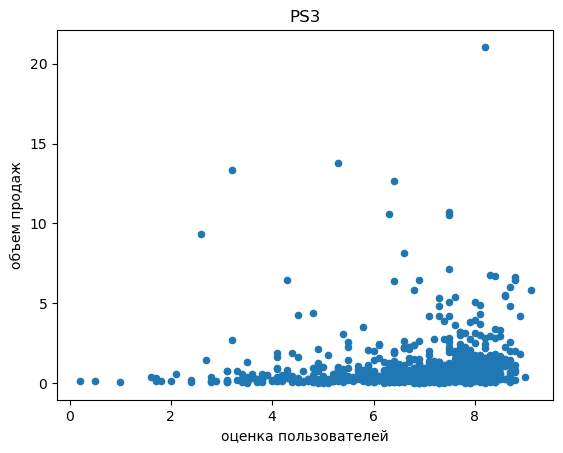

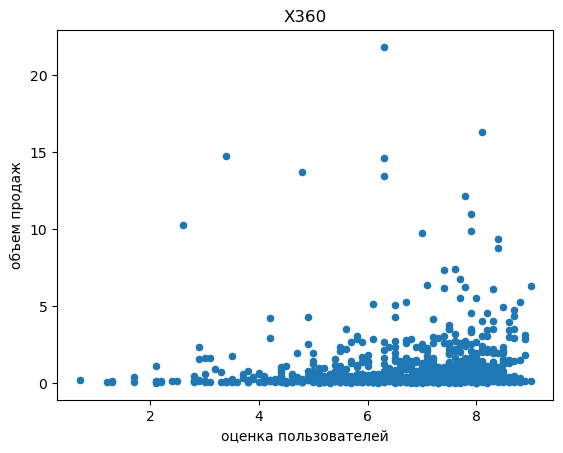

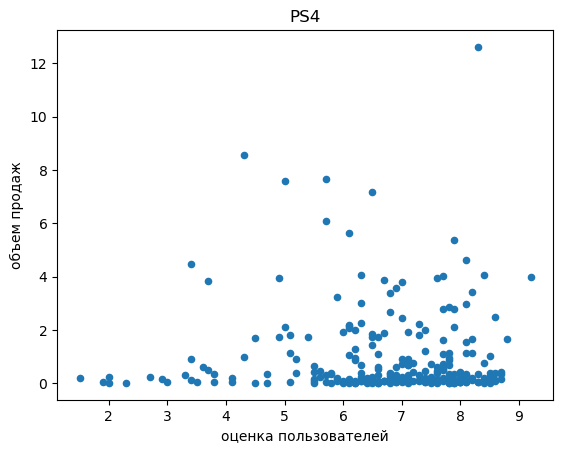

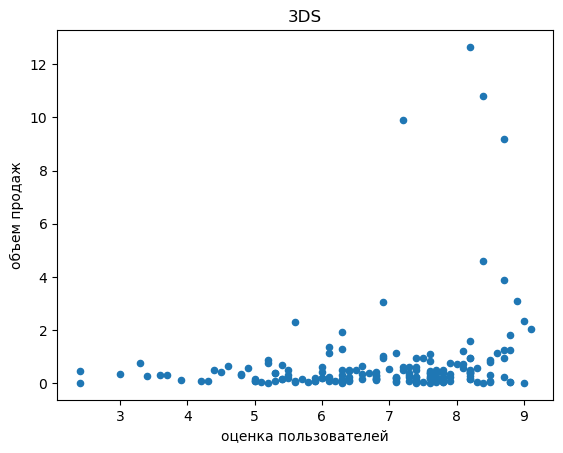

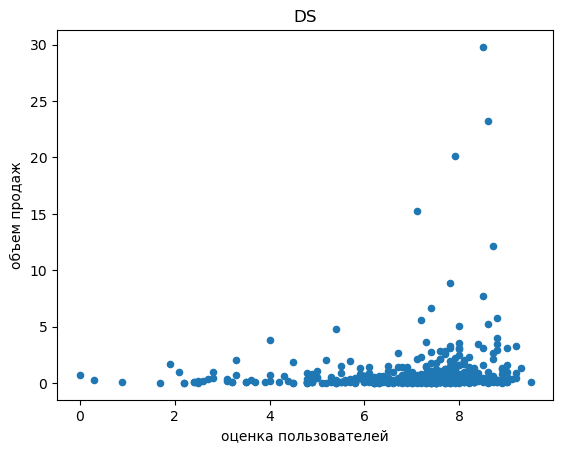

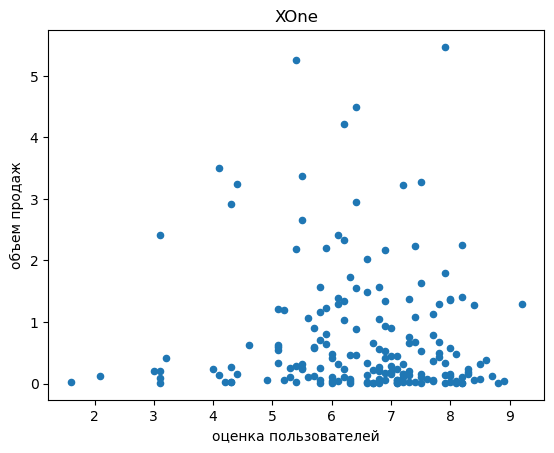

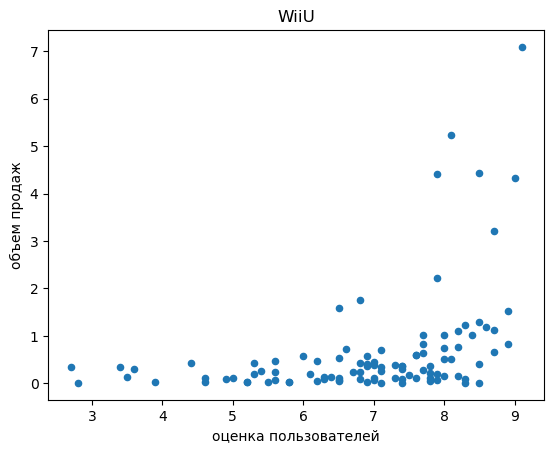

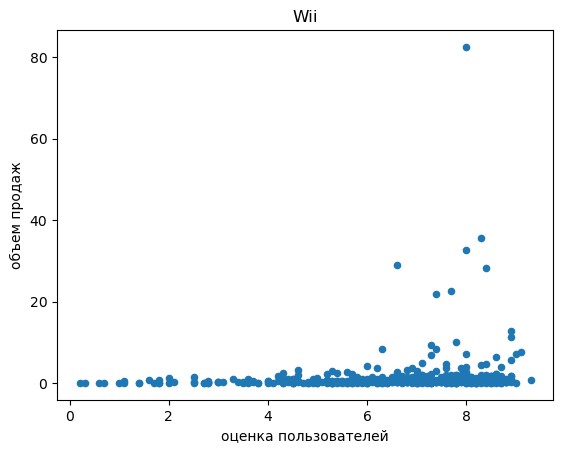

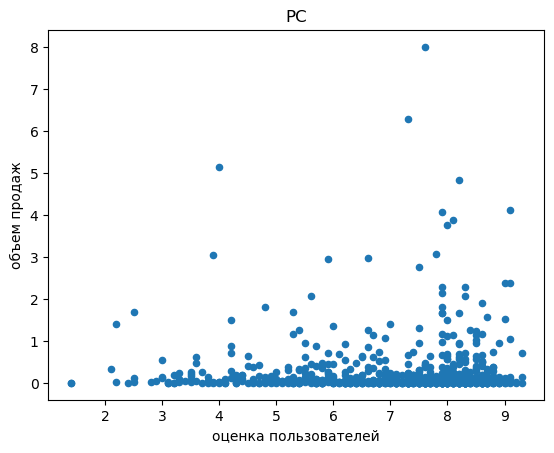

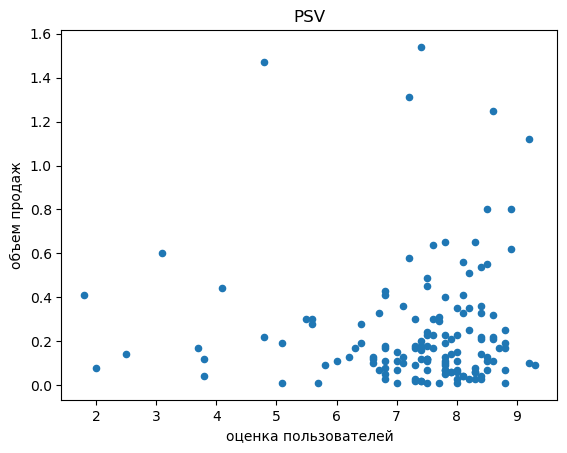

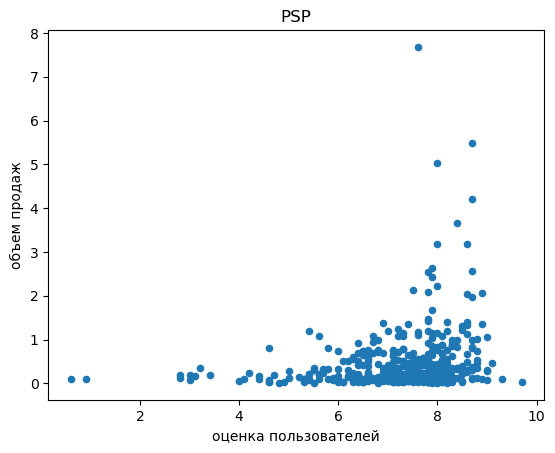

In [54]:
for platform in data_greater_2012['platform'].unique():
    (data.loc[(data['platform'] == platform)&(data['user_score'] >= 0)][['user_score', 'critic_score', 'total_sales']]
        .plot(kind='scatter', x='user_score', y='total_sales', title=platform, xlabel='оценка пользователей', ylabel='объем продаж')
    );    

### Выводы по зависимости оценки пользователей и критиков на объем продаж

Для всех платформ кроме Xone, PSV и PSP зависимость линейная. Чем выше оценка пользователей, тем выше объем продаж игр.

### Влияние оценки критиков на объем продаж

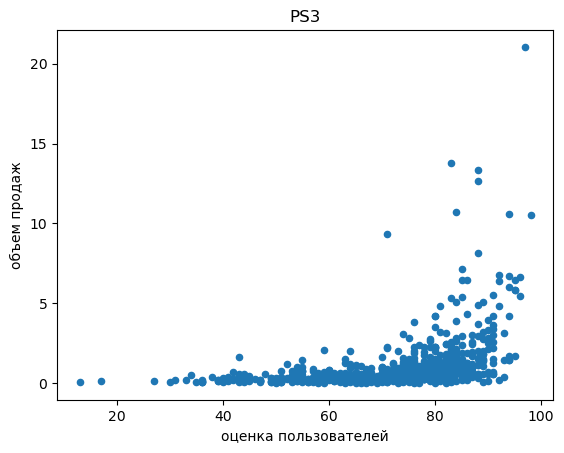

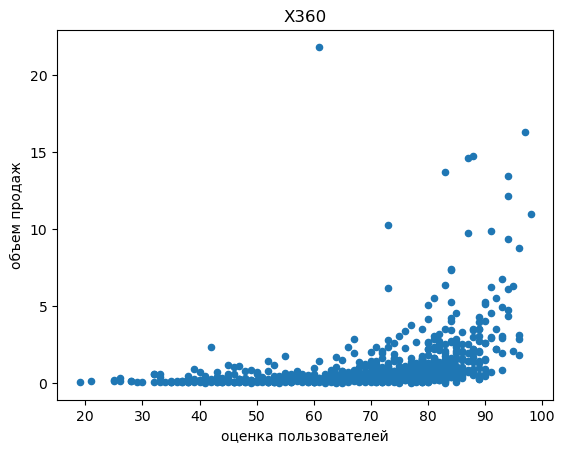

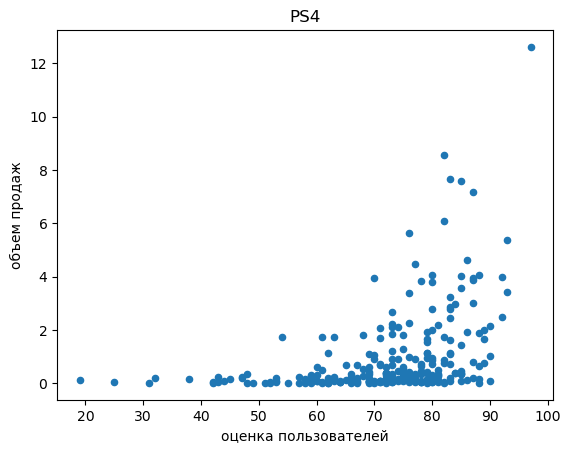

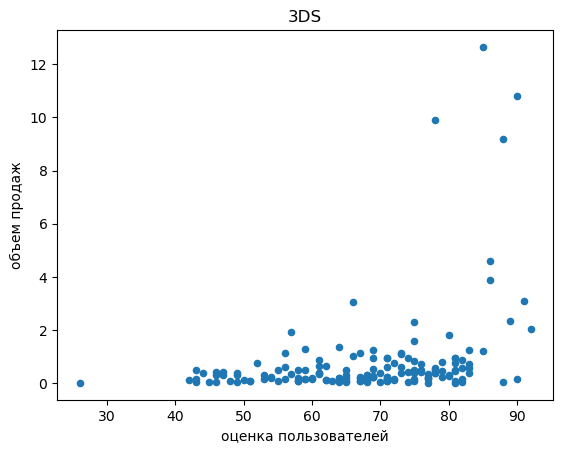

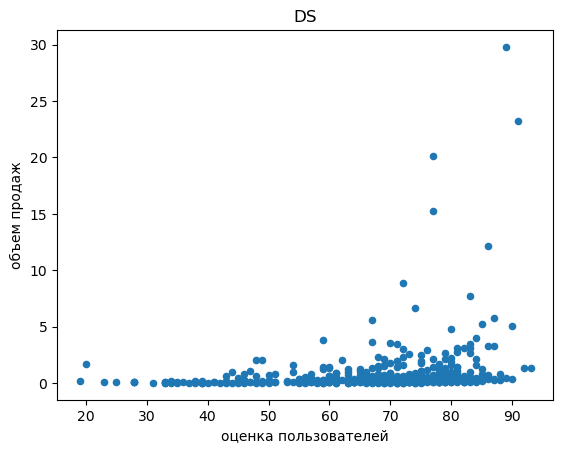

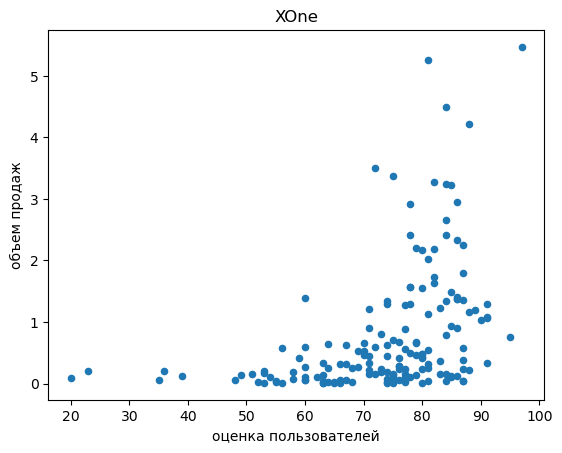

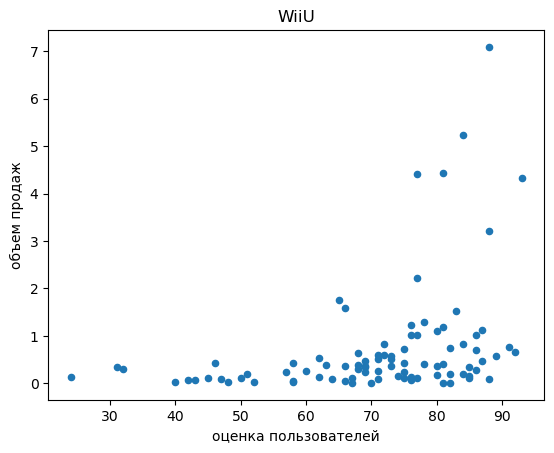

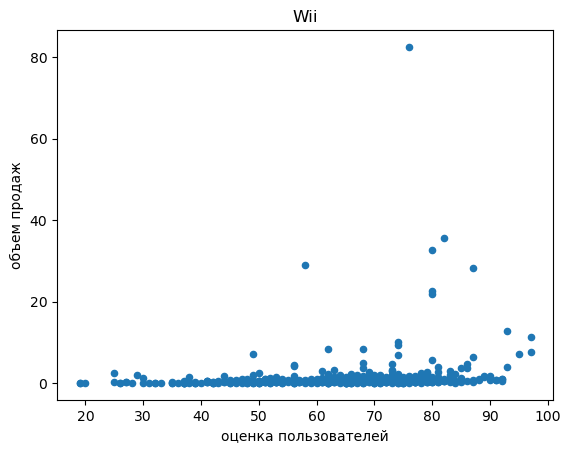

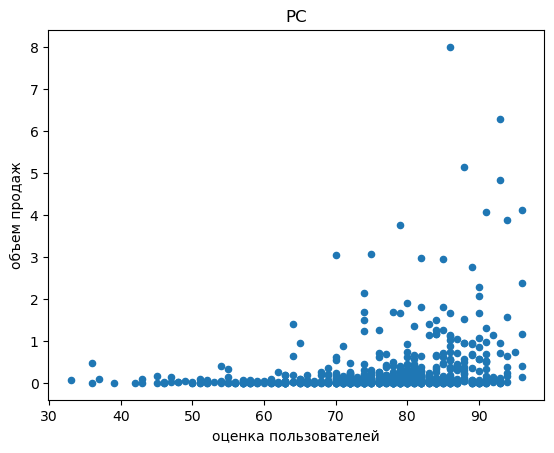

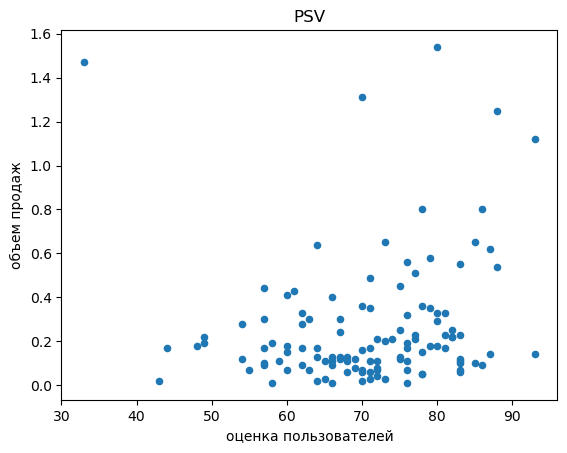

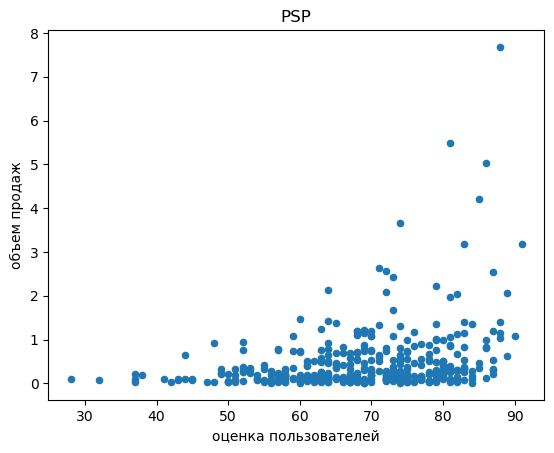

In [55]:
for platform in data_greater_2012['platform'].unique():
    (data.loc[(data['platform'] == platform)&(data['user_score'] >= 0)][['user_score', 'critic_score', 'total_sales']]
        .plot(kind='scatter', x='critic_score', y='total_sales', title=platform, xlabel='оценка пользователей', ylabel='объем продаж')
    );    

## Анализ жанров игр

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

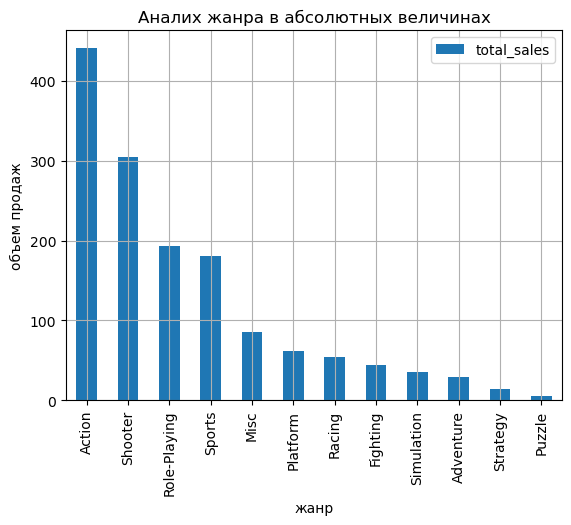

In [56]:
(data_greater_2012
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .reset_index()
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', x='genre', y='total_sales', grid=True, title='Аналих жанра в абсолютных величинах', xlabel='жанр', ylabel='объем продаж')
);

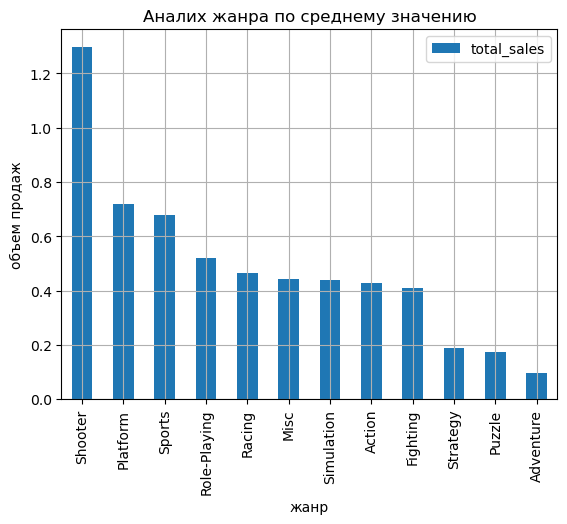

In [57]:
(data_greater_2012
 .pivot_table(index='genre', values='total_sales', aggfunc='mean')
 .reset_index()
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', x='genre', y='total_sales', grid=True, title='Аналих жанра по среднему значению', xlabel='жанр', ylabel='объем продаж')
);

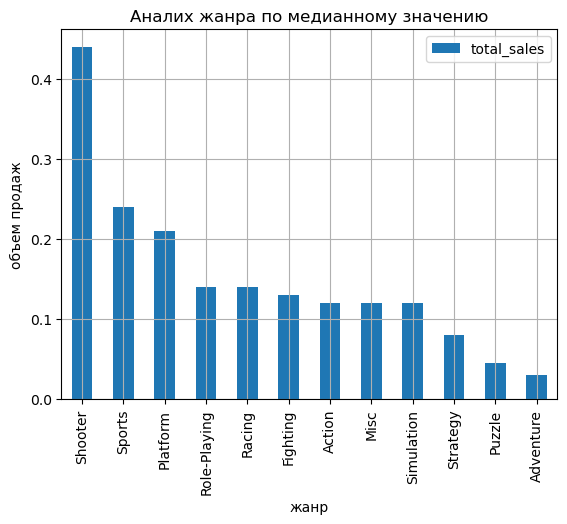

In [58]:
(data_greater_2012
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .reset_index()
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', x='genre', y='total_sales', grid=True, title='Аналих жанра по медианному значению', xlabel='жанр', ylabel='объем продаж')
);

Топ 5 жанров игр являются по абсолюным значениям являются:
1. Action - объем продаж `441.52` млн экземпляров.
2. Shooter - объем продаж `304.80` млн экземпляров.
3. Role-Playing	 - объем продаж `193.09` млн экземпляров.
4. Sports - объем продаж `181.09` млн экземпляров.
5. Misc - объем продаж `85.04` млн экземпляров.

**Не поппулярными** жанрами являются:
1. Puzzle - объем продаж `4.89` млн экземпляров.
2. Strategy - объем продаж `13.34` млн экземпляров.
3. Adventure	 - объем продаж `29.52` млн экземпляров.
4. Simulation - объем продаж `35.61` млн экземпляров.
5. Fighting - объем продаж `44.49` млн экземпляров.

Топ 5 жанров игр являются по средним значениям являются:
1. Shooter - объем продаж `441.52` млн экземпляров.
2. Platform - объем продаж `304.80` млн экземпляров.
3. Sports - объем продаж `193.09` млн экземпляров.
4. Role-Playing - объем продаж `181.09` млн экземпляров.
5. Racing - объем продаж `85.04` млн экземпляров.

**Не поппулярными** жанрами являются:
1. Action - объем продаж `4.89` млн экземпляров.
2. Fighting - объем продаж `13.34` млн экземпляров.
3. Strategy - объем продаж `29.52` млн экземпляров.
4. Puzzle - объем продаж `35.61` млн экземпляров.
5. Adventure - объем продаж `44.49` млн экземпляров.

# Портрет пользователя каждого региона

## Регион `NA`

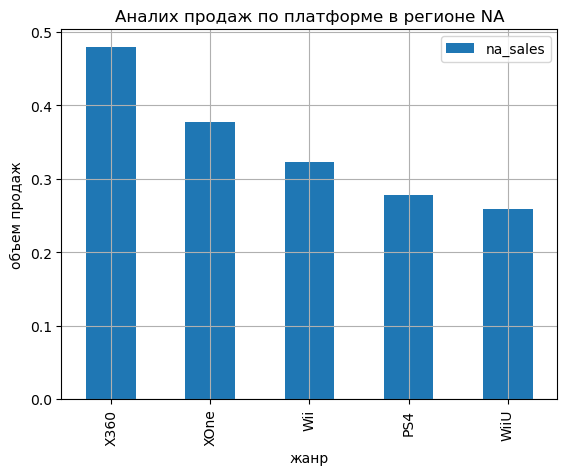

In [59]:
(data_greater_2012
 .pivot_table(index='platform', values=['na_sales'], aggfunc='mean')
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head()
 .plot(kind='bar', x='platform', y='na_sales', grid=True, title='Аналих продаж по платформе в регионе NA', xlabel='жанр', ylabel='объем продаж')
);

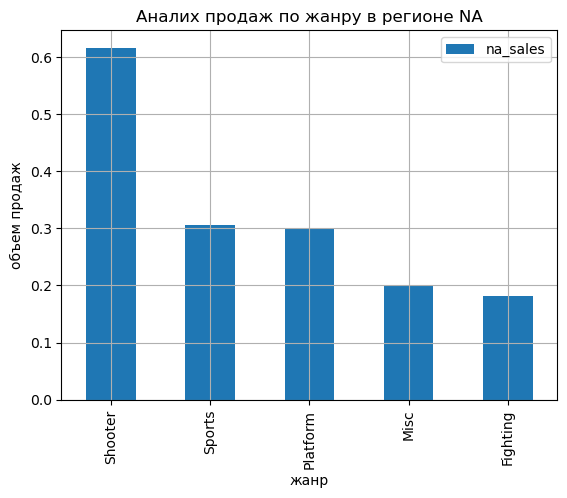

In [60]:
(data_greater_2012
 .pivot_table(index='genre', values=['na_sales'], aggfunc='mean')
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head()
 .plot(kind='bar', x='genre', y='na_sales', grid=True, title='Аналих продаж по жанру в регионе NA', xlabel='жанр', ylabel='объем продаж')
);

В регионе `NA` самамой популярной консолью является `Xbox 360`(устаревающая модель) и `Xbox One` (новая модель). Основной конкурент - Playstation4 уступает в охвате рынка почти в 1.5 раза (108,74 млн проданных игр против 140,05 млн игр.)

Самым популярным жанром игроков является `Shooter`.

## Регион `EU`

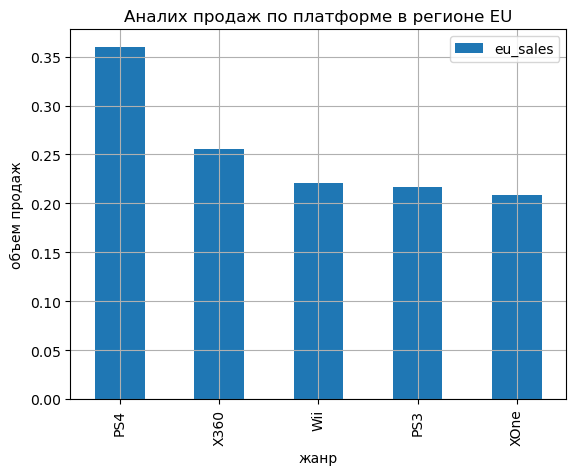

In [61]:
(data_greater_2012
 .pivot_table(index='platform', values='eu_sales', aggfunc='mean')
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head()
 .plot(kind='bar', x='platform', y='eu_sales', grid=True, title='Аналих продаж по платформе в регионе EU', xlabel='жанр', ylabel='объем продаж')
);

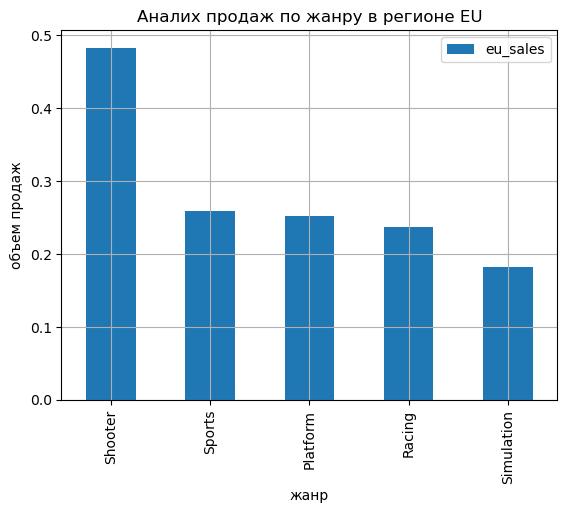

In [62]:
(data_greater_2012
 .pivot_table(index='genre', values='eu_sales', aggfunc='mean')
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head()
 .plot(kind='bar', x='genre', y='eu_sales', grid=True, title='Аналих продаж по жанру в регионе EU', xlabel='жанр', ylabel='объем продаж')
);

В регионе `EU` самамой популярной консолью является `Playstation 4` (`141,09` млн. игр). Основной конкурент - Xbox 360 (устаревающая модель) с количеством проданных игр в `74,52` млн. игр и Xbox One (обновленная модель) с количеством проданных игр в количестве `51,59` млн игр.

Самым популярным жанром игроков является `Shooter`.

## Регион `JP`

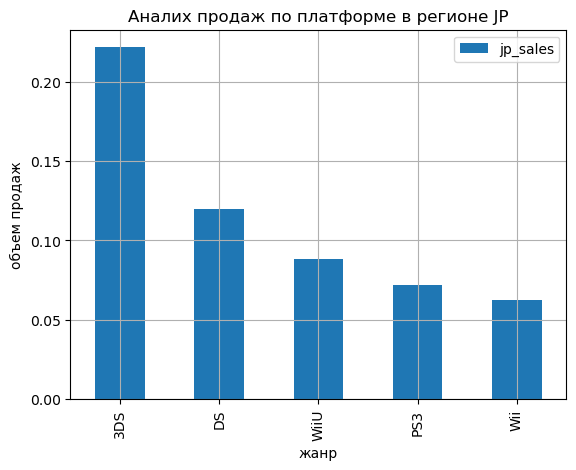

In [63]:
(data_greater_2012
 .pivot_table(index='platform', values='jp_sales', aggfunc='mean')
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head()
 .plot(kind='bar', x='platform', y='jp_sales', grid=True, title='Аналих продаж по платформе в регионе JP', xlabel='жанр', ylabel='объем продаж')
);

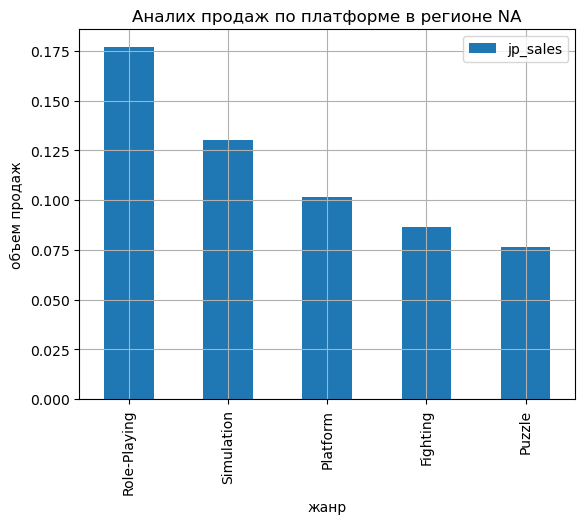

In [64]:
(data_greater_2012
 .pivot_table(index='genre', values='jp_sales', aggfunc='mean')
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head()
 .plot(kind='bar', x='genre', y='jp_sales', grid=True, title='Аналих продаж по платформе в регионе NA', xlabel='жанр', ylabel='объем продаж')
);

В регионе `JP` лидирующую позицию с отрывом более чем в 2 раза по объему проданных занимает платформа `3DS` локального производителя компании Nintendo. 

Самым популярным жанром игроков является `Role-Playing`.

## Остальные регионы

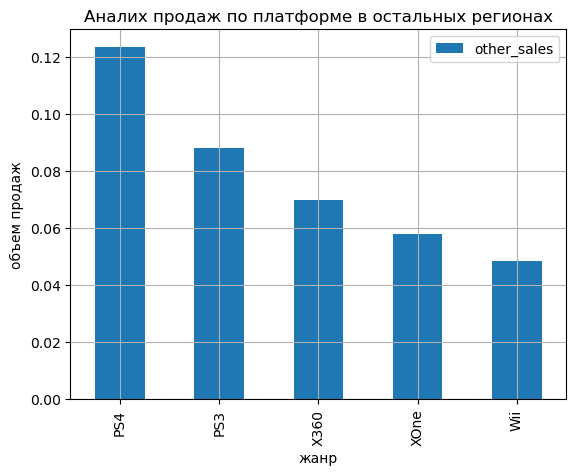

In [65]:
(data_greater_2012
 .pivot_table(index='platform', values='other_sales', aggfunc='mean')
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head()
 .plot(kind='bar', x='platform', y='other_sales', grid=True, title='Аналих продаж по платформе в остальных регионах', xlabel='жанр', ylabel='объем продаж')
);

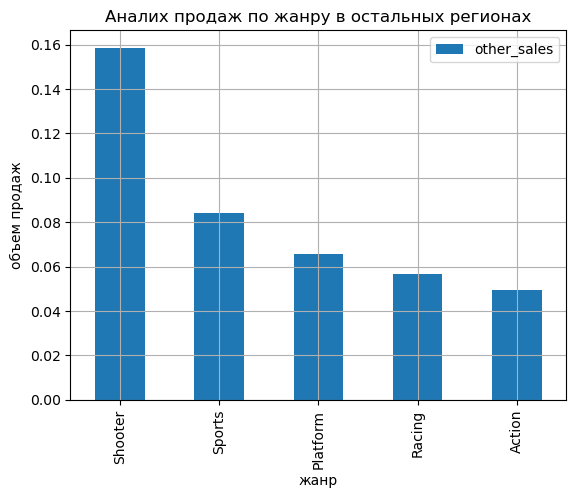

In [66]:
(data_greater_2012
 .pivot_table(index='genre', values='other_sales', aggfunc='mean')
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head()
 .plot(kind='bar', x='genre', y='other_sales', grid=True, title='Аналих продаж по жанру в остальных регионах', xlabel='жанр', ylabel='объем продаж')
);

Анализ остальных регионов в совокупности показыает, что платформа PlayStation 4 занимает лидирующие позиции (`48,35` млн. игр)

Основным популярным жанром, как в регионах `NA` и `EU` являются игры жанра `Shooter`.

## Общие выводы по разделу

По состоянию на декабрь 2016 года, платформа `PlayStation 4` занимает лидирующие позиции в `EU` и остальных регионах.  
Самым популярным жанром почти во всех регионах является `Action`

## Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [67]:
total_sales_sum = data_greater_2012['total_sales'].sum()
total_sales_sum

1446.5300000000002

In [68]:
data_greater_2012['sales_share'] = (data_greater_2012['total_sales']/total_sales_sum)*100

/var/folders/_z/6hlc13zn1cvgwwpz8lp7jckr0000gn/T/ipykernel_24927/2338238396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_greater_2012['sales_share'] = (data_greater_2012['total_sales']/total_sales_sum)*100


In [69]:
(data_greater_2012
 .pivot_table(index='platform', values='sales_share', aggfunc='sum')
 .reset_index()
 .sort_values(by='sales_share', ascending=False)
)

,platform,sales_share
4,PS4,21.716798
3,PS3,19.964328
9,X360,16.352236
0,3DS,13.453575
10,XOne,11.013944
8,WiiU,5.681873
2,PC,4.331054
6,PSV,3.399860
7,Wii,2.445162
1,DS,0.867593


Более 40% проданных игр приходится на консоли `PS4` и `PS3` (*21,7% и 19,944% соответственно*).  
`Xbox 360` и `Xbox One` занимают 27% рынка по объему проданных игр.

## Самые популярные жанры (топ-5). Поясните разницу.

In [70]:
(data_greater_2012
 .pivot_table(index='genre', values='sales_share', aggfunc='sum')
 .reset_index()
 .sort_values(by='sales_share', ascending=False)
 .head()
)
 

,genre,sales_share
0,Action,30.495047
8,Shooter,21.066276
7,Role-Playing,13.328448
10,Sports,12.517542
3,Misc,5.878896


`30%` всех проданных игр с 2021 года приходится на жанр `Action`.  
Вторым по популярности является жанр `Shooter` с долей в `21%` от общего объема продаж.  
Жанр игр `Role_playing` и `Sport` занимают 3 и 4 место по популярности с `13.3%` и `12.5%` соответственно от объема проданных игр.  
Топ-5 жанров закрывает жанр `Misc`, куда отнесены игры, которые нельзя отнести к какому-либо конкретному жанру.

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [71]:
data_greater_2012['rating'] = data_greater_2012['rating'].fillna('no rating')

/var/folders/_z/6hlc13zn1cvgwwpz8lp7jckr0000gn/T/ipykernel_24927/603799198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_greater_2012['rating'] = data_greater_2012['rating'].fillna('no rating')


In [72]:
rating_pivot = (data_greater_2012
 .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum')
 .reset_index()
)
rating_pivot

,rating,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,E,113.03,28.33,114.37,31.44,287.17
1,E10+,55.37,8.19,75.70,16.23,155.49
2,M,193.96,21.20,231.57,63.38,510.11
3,T,52.96,26.02,66.02,17.94,162.94
4,no rating,91.50,108.84,103.31,27.17,330.82


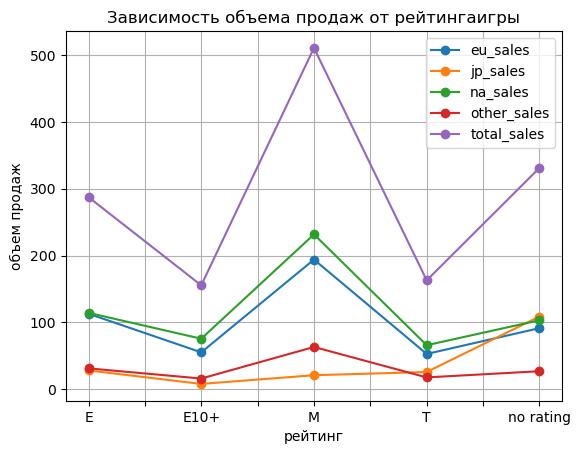

In [73]:
rating_pivot.plot(x='rating', style='o-', grid=True, title='Зависимость объема продаж от рейтингаигры', xlabel='рейтинг', ylabel='объем продаж');

Для всех регионов кроме Японии, игры с рейтингом `M` являются преобладающими рейтингами проданных игр.

# Проверьте гипотезы

В результате исследования, необходимо проверить 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Для проверки гипотез будет использован метод T-test, так как надо провести исследование двух независимых между собой генеральных совокупностей.

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для проверки гипотезы об одинаковости средних пользовательских оценок для платформ `Xbox One` и `PC` будут установлены:
1. Гипотеза H0: Средний пользовательский рейтинг платформ `Xbox One` и `PC` **одинаковый**.
2. Гипотеза H1: Средний пользовательский рейтинг платформ `Xbox One` и `PC` **разный**.

Уровень значимости `alpha` приравняем к значению 0.05.

*За гипотезу H0 принимается пессимистичная(обратная) гипотеза от той, которую необходимо проверить*  
*Использован параметрический критерий (t-критерий Стьюдента) для независимых выборок*

In [74]:
data.loc[(data['platform'] == 'XOne')&(data['user_score'] >= 0), 'user_score'].var()

1.9069968429360702

In [75]:
data.loc[(data['platform'] == 'PC')&(data['user_score'] >= 0), 'user_score'].var()

2.3492243750768553

Дисперсия для выборки ГС рейтинга:
* для платформы `Xbox One` = 1.9;
* для платформы `PC` = 2.34.

Дисперсия у выборок разная, из чего следует, что при использовании метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам будет осуществляться с параметром `equal_var = False`

In [76]:
stat, p = st.ttest_ind(data_greater_2012.loc[(data_greater_2012['platform'] == 'XOne')&(data_greater_2012['user_score'] >= 0), 'user_score'], 
                       data_greater_2012.loc[(data_greater_2012['platform'] == 'PC')&(data_greater_2012['user_score'] >= 0), 'user_score'],
                       equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Вероятно тоже распределение')
else:
 print('Вероятно распределение разное')

stat=0.600, p=0.549
Вероятно тоже распределение


Гипотеза H0 о среднем пользовательском рейтинге платформ `Xbox One` и `PC` **одинаковый** - подтвердилась.

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотезы о разности средних пользовательских оценок для жанров `Action` и `Sports` будут установлены:
1. Гипотеза H0: Средний пользовательский рейтинг жанров `Action` и `Sports` **одинаковый**.
2. Гипотеза H1: Средний пользовательский рейтинг жанров `Action` и `Sports` **разный**.

Уровень значимости `alpha` приравняем к значению 0.05.

*За гипотезу H0 принимается пессимистичная(обратная) гипотеза от той, которую необходимо проверить*  
*Использован параметрический критерий (t-критерий Стьюдента) для независимых выборок*

In [77]:
data.loc[(data['genre'] == 'Action')&(data['user_score'] >= 0), 'user_score'].var()

2.027493768262491

In [78]:
data.loc[(data['genre'] == 'Sports')&(data['user_score'] >= 0), 'user_score'].var()

2.623532591906079

Дисперсия для выборки ГС:
* для жанра `Action` = 2.03;
* для жанра `Sports` = 2.59.

Дисперсия у выборок разная, из чего следует, что при использовании метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам будет осуществляться с параметром `equal_var = False`

In [79]:
# alpha = задайте значение уровня значимости
alpha = 0.05

stat, p = st.ttest_ind(data_greater_2012.loc[(data['genre'] == 'Action')&(data_greater_2012['user_score'] >= 0), 'user_score'], 
                       data_greater_2012.loc[(data_greater_2012['genre'] == 'Sports')&(data_greater_2012['user_score'] >= 0), 'user_score'], 
                       equal_var=False)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
 print('Средние значения одинаковы')
else:
 print('Средние значения разные')

stat=9.863, p=0.000
Средние значения разные


<!-- Анализ выше показал, что нулевая гипотеза об одинаковости среднего рейтинга для жанров `Action` и `Sports` подтвердилась, из чего можно сделать вывод, что средний рейтинг оценки пользователей для этих платформ одинаковый.  
**Исследование 2 не подтвердилось** -->

Анализ выше показал, что нулевая гипотеза об одинаковости среднего рейтинга для жанров `Action` и `Sports` **не подтвердилась**, из чего можно сделать вывод, что средний рейтинг оценки пользователей для этих платформ разный.  
**Исследование 2 подтвердилось**

### Выводы по проверкам гипотез

В ходе ииследования, необходимо было проанализировать 2 гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **подтверждена**.
2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные - **не подтверждена**.


# Общий вывод

## Дополнительные обработка

### Группровка по платформам

Для понимания платформ, целесообразно провести категоризацию по производителям, так как это поможет увидеть общие цифры по объемам продаж.

In [80]:
# функция, на входе которой принимает значение платформы из таблицы и распределяет по соответствующим категориям платформ.
def categorize_platform(platform):
    Playstation = ['PSP', 'PS', 'PS2', 'PS3', 'PS4', 'PSV']
    Nintendo = ['Wii', 'NES', 'GB', 'DS', 'SNS', 'GBA', '3DS', 'N64', 'WiiU', 'GC', 'SCD', 'NS', 'SNES']
    Xbox = ['XB', 'XOne', 'X360']
    Atari = ['2600']
    Gen = ['gen']
    Dreamcast = ['DC']
    Sega = ['SAT']
    Bandai = ['WS']
    NeoGame = ['NG']
    if platform in Playstation:
        return 'Playstation'
    elif platform in Nintendo:
        return 'Nintendo'
    elif platform in Xbox:
        return 'Xbox'
    else:
        return platform

In [81]:
# применение функции
data['platform_category'] = data['platform'].apply(categorize_platform)

In [82]:
data.pivot_table(index='platform_category', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

,platform_category,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Playstation,1092.49,470.41,1526.25,461.29,3550.44
1,Nintendo,775.13,759.36,1744.71,189.76,3468.96
2,Xbox,379.56,14.02,870.92,107.63,1372.13
3,PC,140.37,0.17,93.34,21.88,255.76
4,2600,4.86,0.00,80.78,0.84,86.48
5,SAT,0.54,32.26,0.72,0.07,33.59
6,GEN,5.52,2.67,19.27,0.89,28.35
7,DC,1.69,8.56,5.43,0.27,15.95
8,NG,0.00,1.44,0.00,0.00,1.44
9,WS,0.00,1.42,0.00,0.00,1.42


## Общие выводы

Проведенная работа позволяет нам определить потенциально популярный продукт на следующий период.
В соответствии с п 4.6. - 4.8. рекламную компанию целесообразно направить на игры в жанре `Action` и `Shooter` с рейтингом `M` на платформе `PlayStation 4`. При выборе игры для рекламы, в большой степени необходимо обращать внимание на оценку критиков, а не оценку игроков.

Из анализа выше видно, что основными платформами, на которые стоит инвестировать рекламу в 2017 году являются платформы **PlayStaton 4** и **Xbox One**.  
Были проверены две гипотезы: 
* Средняя оценка пользователей на этих платформах равна.  
* Средние оценки для жанров `Actrion` и `Sports` разные.

Самым популярным рейтингом игры стал рейтинг `M`.  
Самыми пополярнми жанрами игр следует признать игры жанра `Shooter`.  
Для региона `JP` следует изменить рекламную стратегию и рассматривать игры на платформе `3DS` в жанре `Role-Playing`.  
Одной из лучших рекламных стратегий будет инвестирование в оценку критиков, так как она имеет большой вес при продажах игр в каждом представленном регионе.  
При выборе между `PlayStation` и `Xbox` предпочтение стоит отдать платформе `PlayStation`, т.к. (в соответствии с п. 6.1.) компания PayStation в целом смогла продать большее количество игр при анализе сгрупированной по платформам данных.  

В дальнейшем, так же необходимо рассмотреть `успешность` эксклюзивных игр для разных платформ, так как они могут привлекать большую существующую аудиторию, а так же привлекать новых игроков по рекомендациям других.